In [1]:
import sys
sys.path.append("..")

import pickle

from src.environments import *
from src.agents import *
from src.agent_utils import *

## Here we experiment on the Binary Tree

In [2]:
env = BinaryTree.default(N = 4, cost = 9, final_reward = 10)

Check that the last room is actually optimal

In [3]:
env.get_true_Q(0.98)
print(env.optimal_pi, env.optimal_Q)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]] [[ 7.01852899  7.60924899]
 [ 7.16176427  4.16176427]
 [ 7.16176427 10.82576427]
 [ 7.30792273  4.30792273]
 [ 7.30792273  4.30792273]
 [ 7.30792273  4.30792273]
 [ 7.30792273 14.10792273]
 [ 7.45706401  4.45706401]
 [ 7.45706401  4.45706401]
 [ 7.45706401  4.45706401]
 [ 7.45706401  4.45706401]
 [ 7.45706401  4.45706401]
 [ 7.45706401  4.45706401]
 [ 7.45706401  4.45706401]
 [ 7.45706401 17.45706401]]


# UCB (Upper Confidence Bound)

### We first test with UBE

In [4]:
len_episode = 3000

spl_ube = SimplePlotter('BT_UCB_UBE',
                    env,
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 0.5, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_1p5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 0.1, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_1', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 0.01, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_0p5', 
                                          gamma =  0.98))

spl_ube.run_experiments(len_episode, 1, fair_comparison = False)

100%|██████████| 3000/3000 [01:34<00:00, 31.81it/s]


In [5]:
color_codes = {'beta_1p5': "#00002f", 
               'beta_1': "#f23a14",
               'beta_0p5': "#006ffb"}

legend_codes = {'beta_1p5': r'$\beta = 0.5$', 
               'beta_1': r'$\beta = 0.1$',
               'beta_0p5': r'$\beta = 0.01$'}

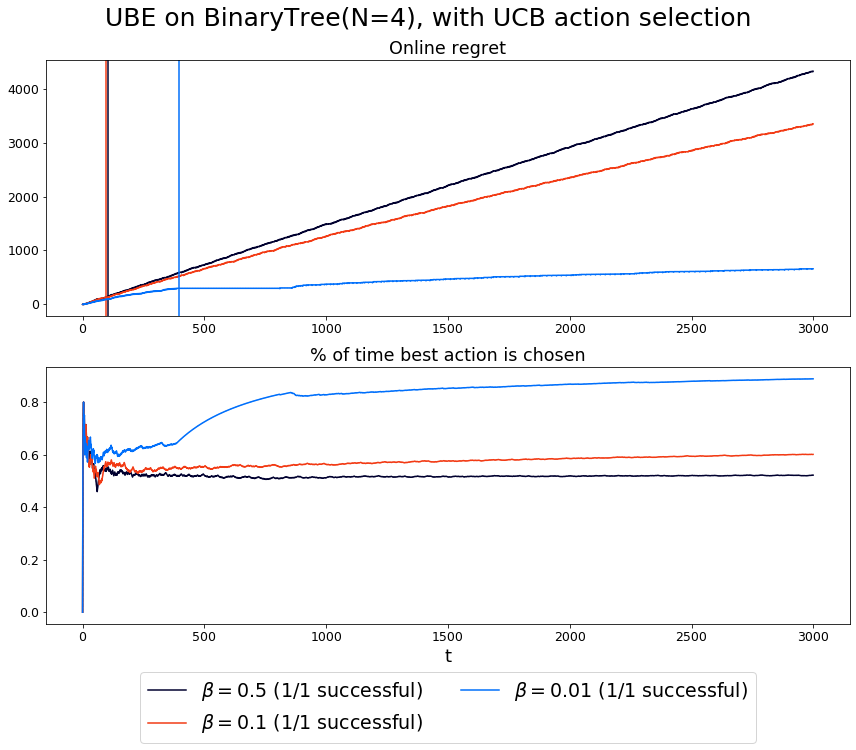

In [6]:
spl_ube.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'UBE on BinaryTree(N=4), with UCB action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [7]:
colors = {'beta_1': {'mean': '#f23a14', 'var': '#f23a14'},
          'beta_0p5': {'mean': '#f23a14', 'var': '#f23a14'},
         'beta_1p5': {'mean': '#f23a14', 'var': '#f23a14'}}

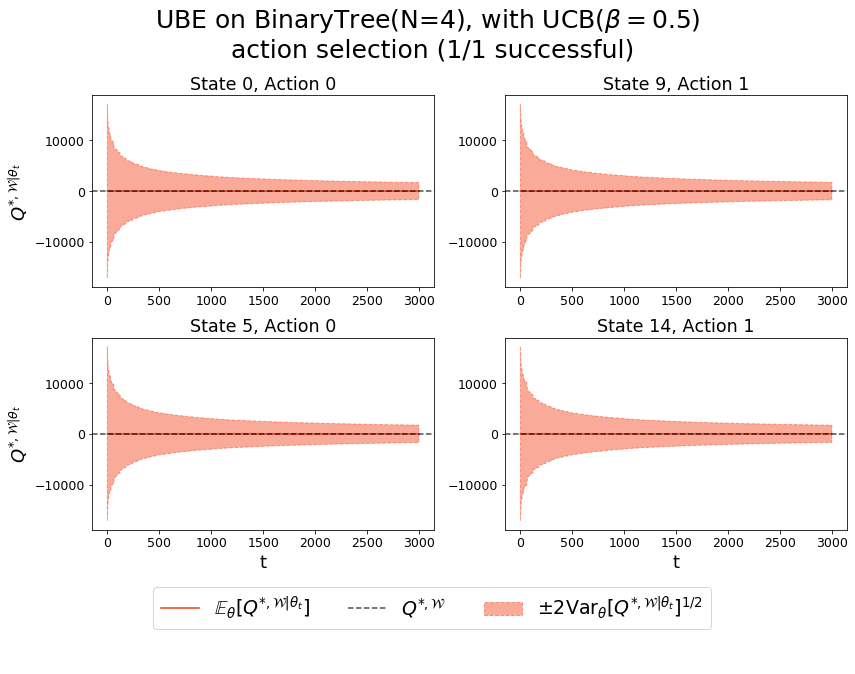

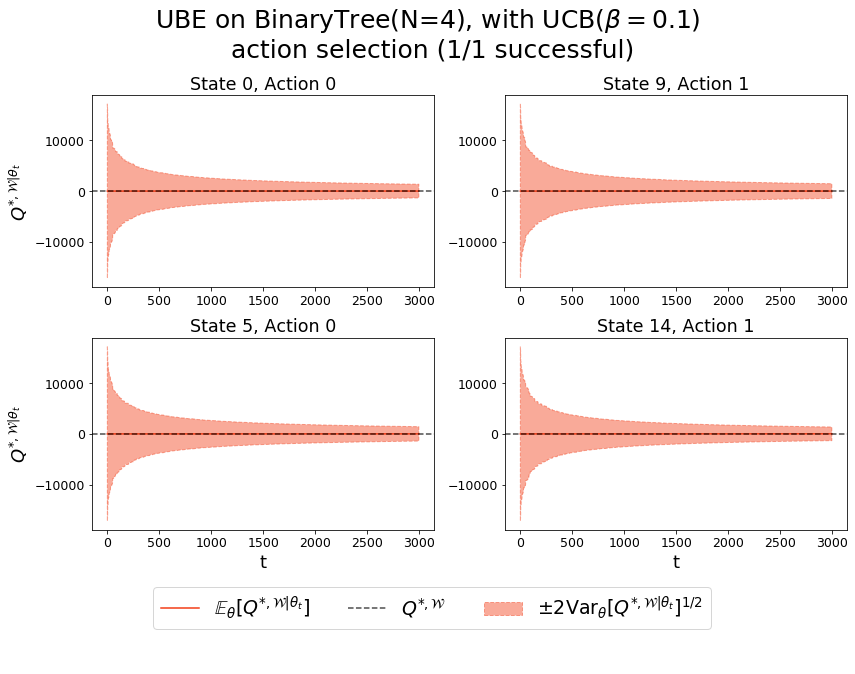

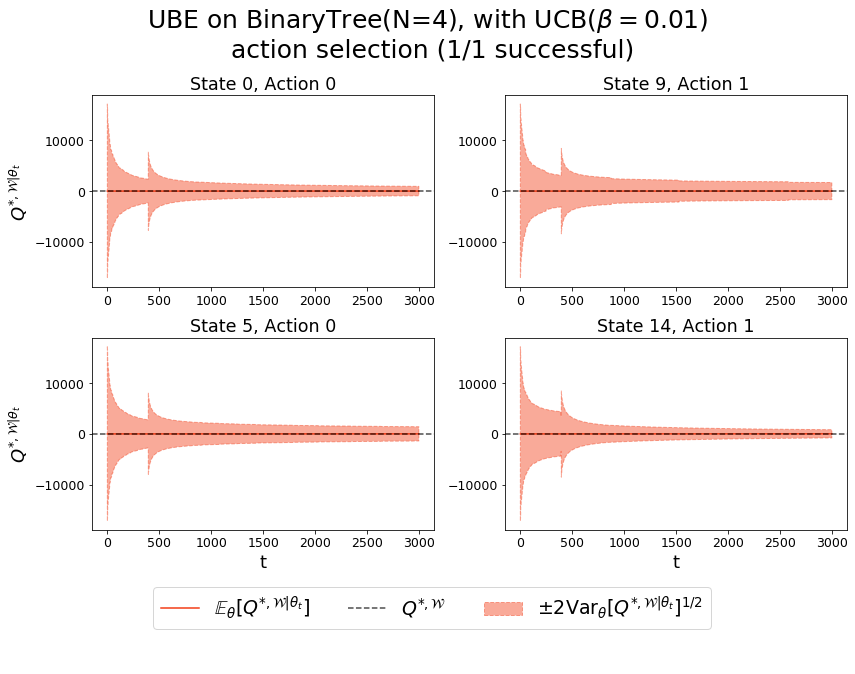

In [8]:
spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on BinaryTree(N=4), with UCB($\beta = 0.5$)' + ' \n action selection',
                 list_agents = ['beta_1p5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on BinaryTree(N=4), with UCB($\beta = 0.1$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on BinaryTree(N=4), with UCB($\beta = 0.01$)' + ' \n action selection',
                 list_agents = ['beta_0p5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

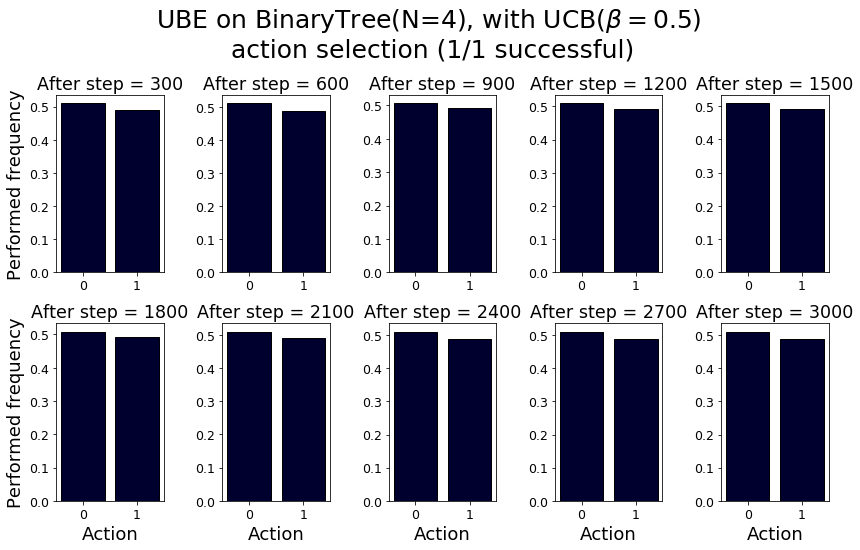

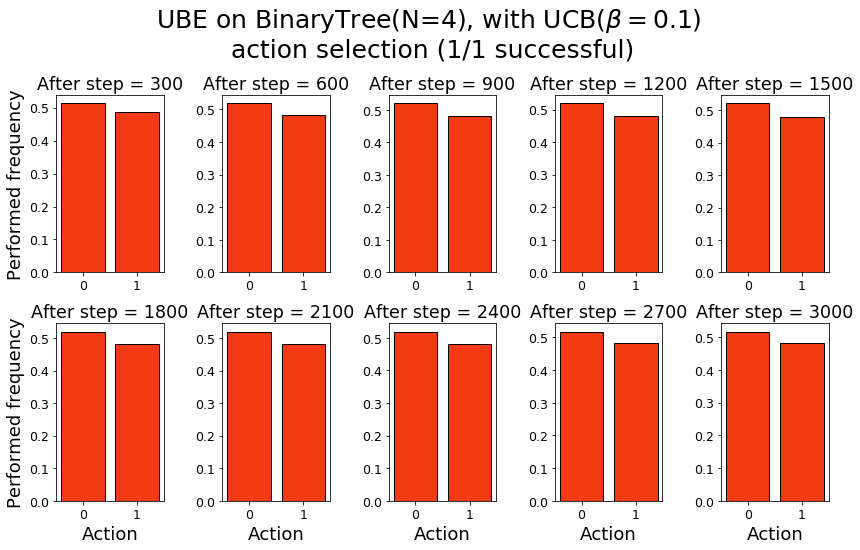

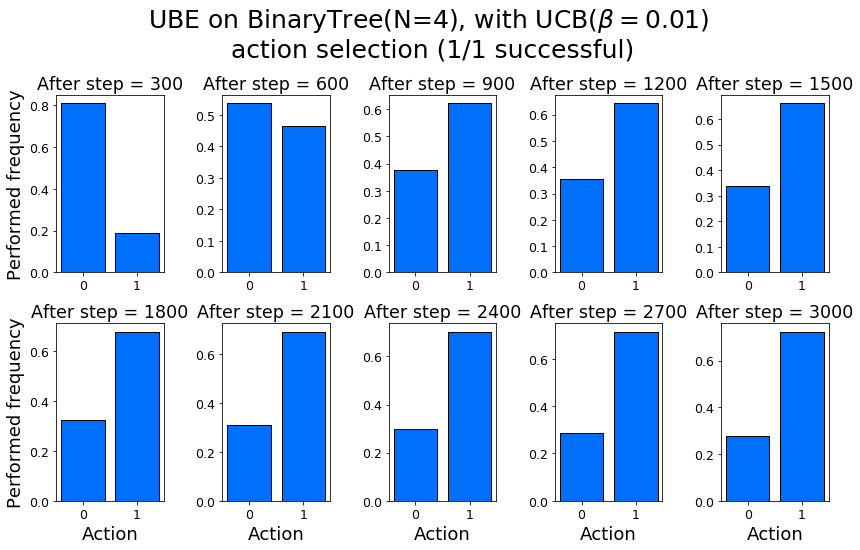

In [9]:
spl_ube.plot_action_freq(list_agents = ['beta_1p5'], 
                        colors = color_codes,
                        title = r'UBE on BinaryTree(N=4), with UCB($\beta = 0.5$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_ube.plot_action_freq(list_agents = ['beta_1'], 
                        colors = color_codes,
                        title = r'UBE on BinaryTree(N=4), with UCB($\beta = 0.1$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_ube.plot_action_freq(list_agents = ['beta_0p5'], 
                        colors = color_codes,
                        title = r'UBE on BinaryTree(N=4), with UCB($\beta = 0.01$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [10]:
spl_ube.print_performance_metrics()

Final regret of agent beta_1p5 is 4335.0
Final % of best action of agent beta_1p5 is 0.5216666666666666
Mean successful time is 103.0


Final regret of agent beta_1 is 3355.0
Final % of best action of agent beta_1 is 0.6006666666666667
Mean successful time is 95.0


Final regret of agent beta_0p5 is 659.0
Final % of best action of agent beta_0p5 is 0.8883333333333333
Mean successful time is 395.0




### Then we test with EUDV

In [11]:
len_episode = 3000

spl_eudv = SimplePlotter('BT_UCB_EUDV',
                    env,
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 10, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_10', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 5, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_1', 
                                          gamma =  0.98))

spl_eudv.run_experiments(len_episode, 1, fair_comparison = False)

100%|██████████| 3000/3000 [00:18<00:00, 164.16it/s]


In [12]:
color_codes = {'beta_10': "#00002f", 
               'beta_5': "#f23a14",
               'beta_1': "#006ffb"}

legend_codes = {'beta_10': r'$\beta = 10$', 
               'beta_5': r'$\beta = 5$',
               'beta_1': r'$\beta = 1$'}

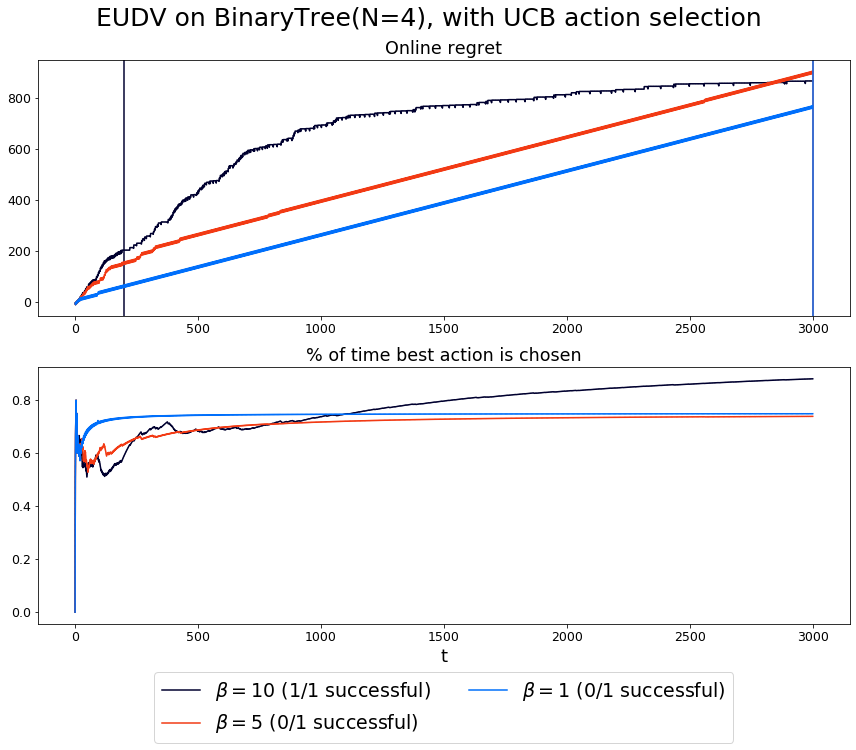

In [13]:
spl_eudv.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'EUDV on BinaryTree(N=4), with UCB action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [14]:
colors = {'beta_10': {'mean': '#3138fb', 'var': '#3138fb'},
          'beta_5': {'mean': '#3138fb', 'var': '#3138fb'},
          'beta_1': {'mean': '#3138fb', 'var': '#3138fb'}}

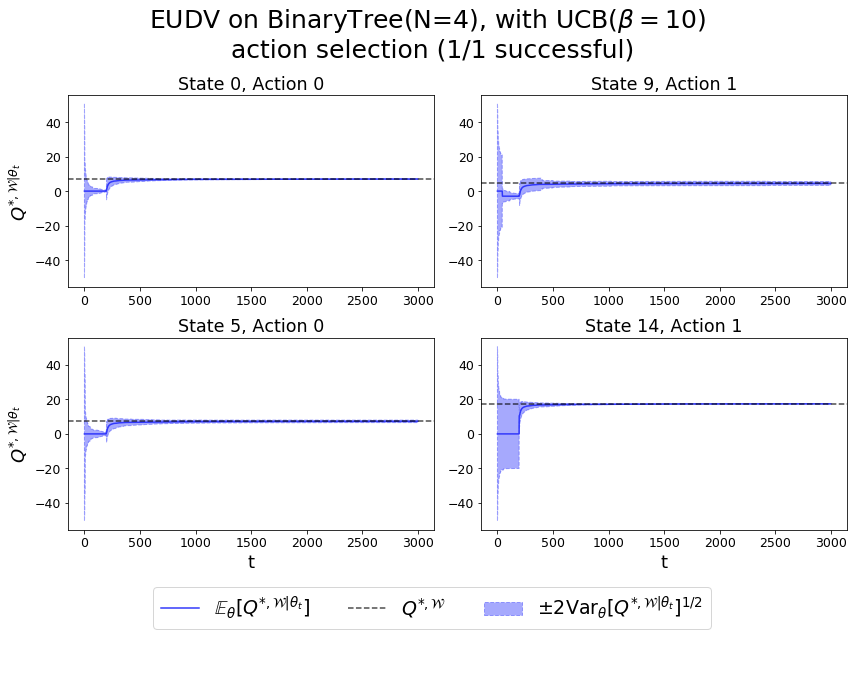

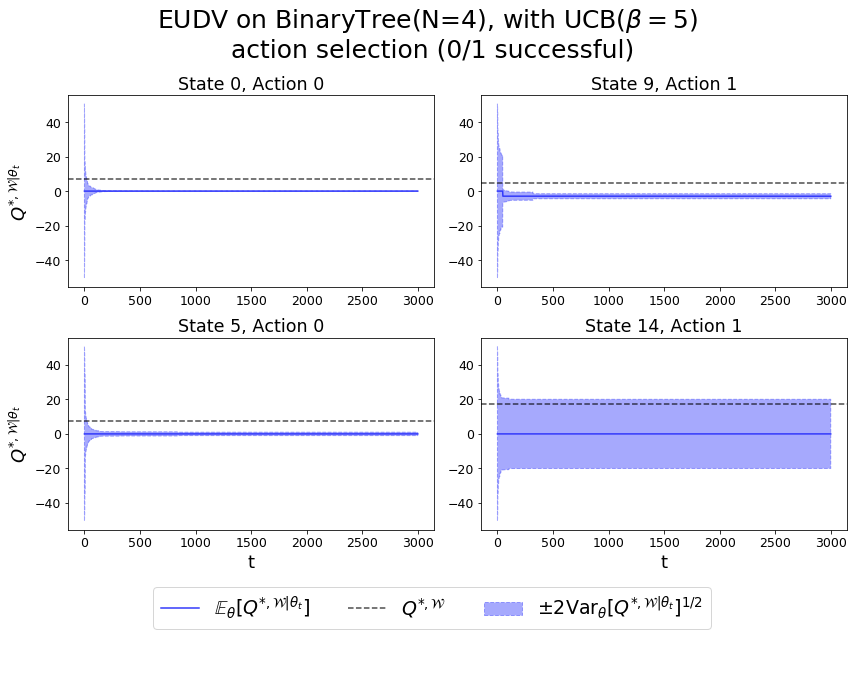

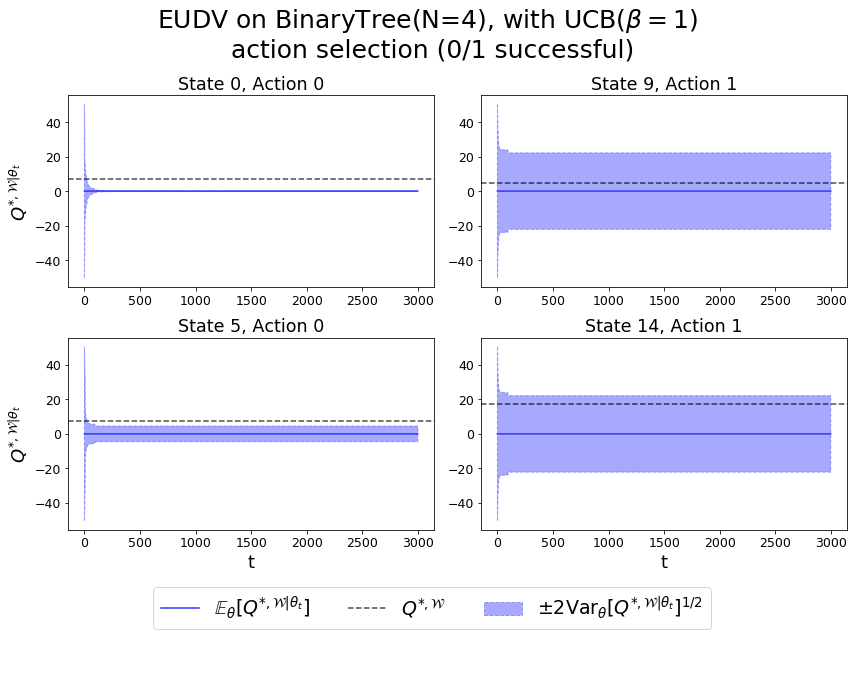

In [15]:
spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on BinaryTree(N=4), with UCB($\beta = 10$)' + ' \n action selection',
                 list_agents = ['beta_10'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on BinaryTree(N=4), with UCB($\beta = 5$)' + ' \n action selection',
                 list_agents = ['beta_5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on BinaryTree(N=4), with UCB($\beta = 1$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

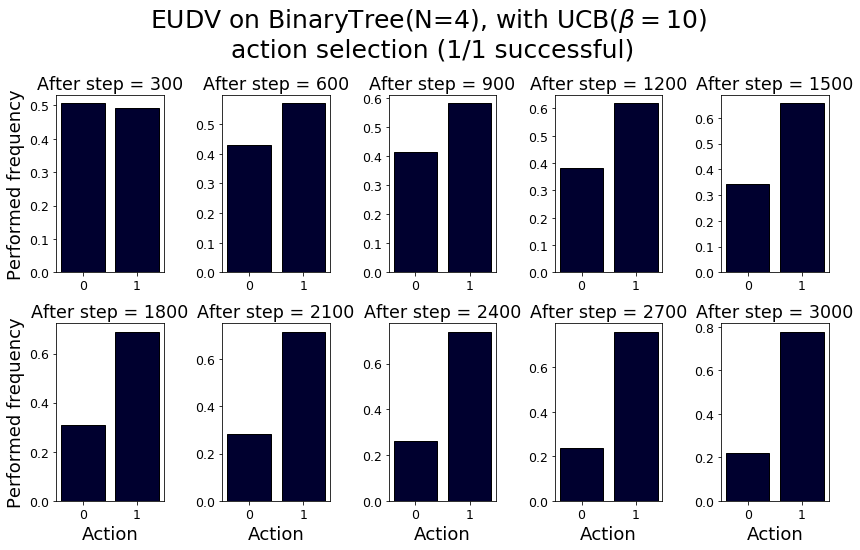

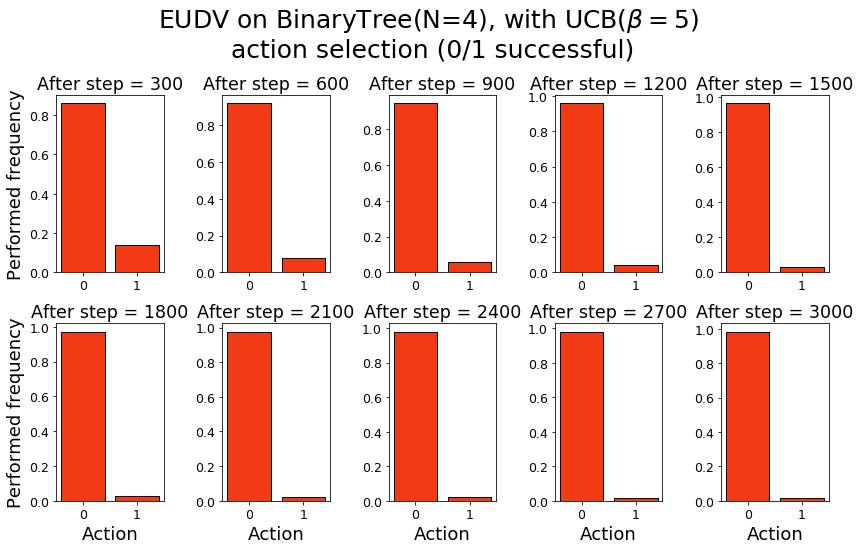

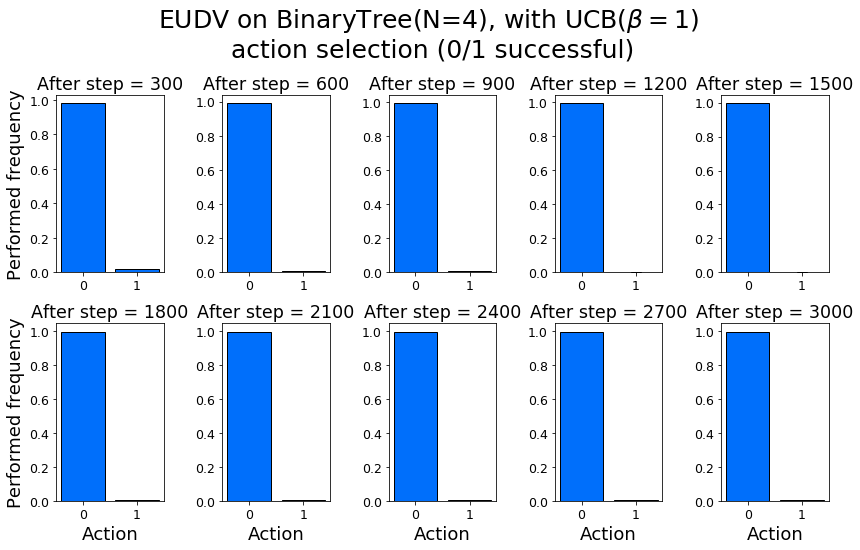

In [16]:
spl_eudv.plot_action_freq(list_agents = ['beta_10'], 
                        colors = color_codes,
                        title = r'EUDV on BinaryTree(N=4), with UCB($\beta = 10$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_eudv.plot_action_freq(list_agents = ['beta_5'], 
                        colors = color_codes,
                        title = r'EUDV on BinaryTree(N=4), with UCB($\beta = 5$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_eudv.plot_action_freq(list_agents = ['beta_1'], 
                        colors = color_codes,
                        title = r'EUDV on BinaryTree(N=4), with UCB($\beta = 1$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [17]:
spl_eudv.print_performance_metrics()

Final regret of agent beta_10 is 865.0
Final % of best action of agent beta_10 is 0.8806666666666667
Mean successful time is 199.0


Final regret of agent beta_5 is 903.0
Final % of best action of agent beta_5 is 0.739
Mean successful time is 3000.0


Final regret of agent beta_1 is 768.0
Final % of best action of agent beta_1 is 0.749
Mean successful time is 3000.0




### And finally with EUB

In [18]:
len_episode = 3000

spl_eub = SimplePlotter('BT_UCB_EUB',
                    env,
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 5, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 3, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_3', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'UCB',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_1', 
                                          gamma =  0.98))

spl_eub.run_experiments(len_episode, 1, fair_comparison = False)

100%|██████████| 3000/3000 [04:05<00:00, 12.21it/s]


In [19]:
color_codes = {'beta_5': "#00002f", 
               'beta_3': "#f23a14",
               'beta_1': "#006ffb"}

legend_codes = {'beta_5': r'$\beta = 5$', 
               'beta_3': r'$\beta = 3$',
               'beta_1': r'$\beta = 1$'}

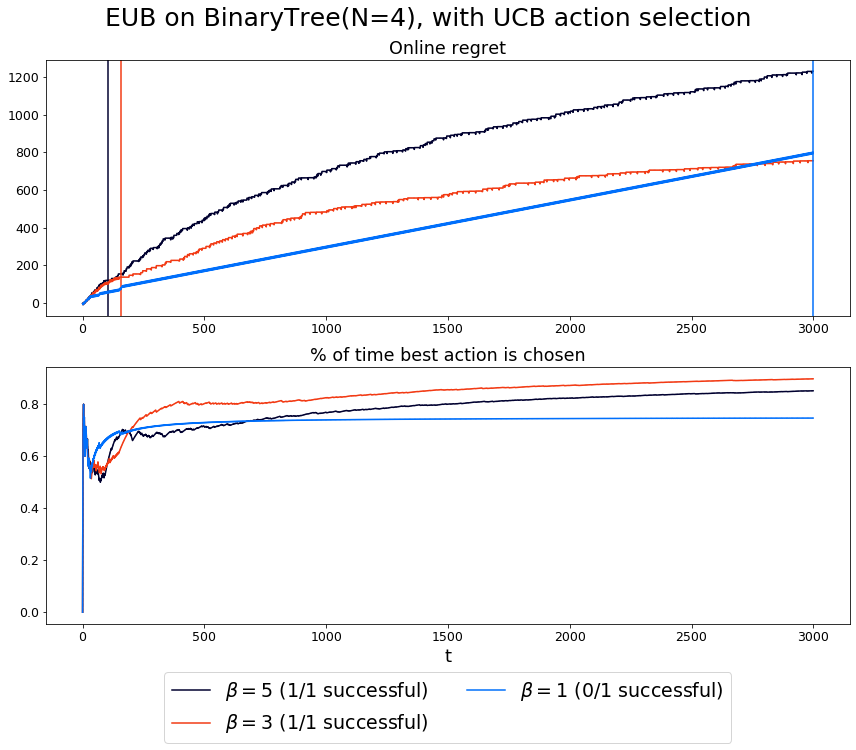

In [20]:
spl_eub.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'EUB on BinaryTree(N=4), with UCB action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [21]:
colors = {'beta_5': {'mean': '#f30894', 'var': '#f30894'},
          'beta_3': {'mean': '#f30894', 'var': '#f30894'},
          'beta_1': {'mean': '#f30894', 'var': '#f30894'}}

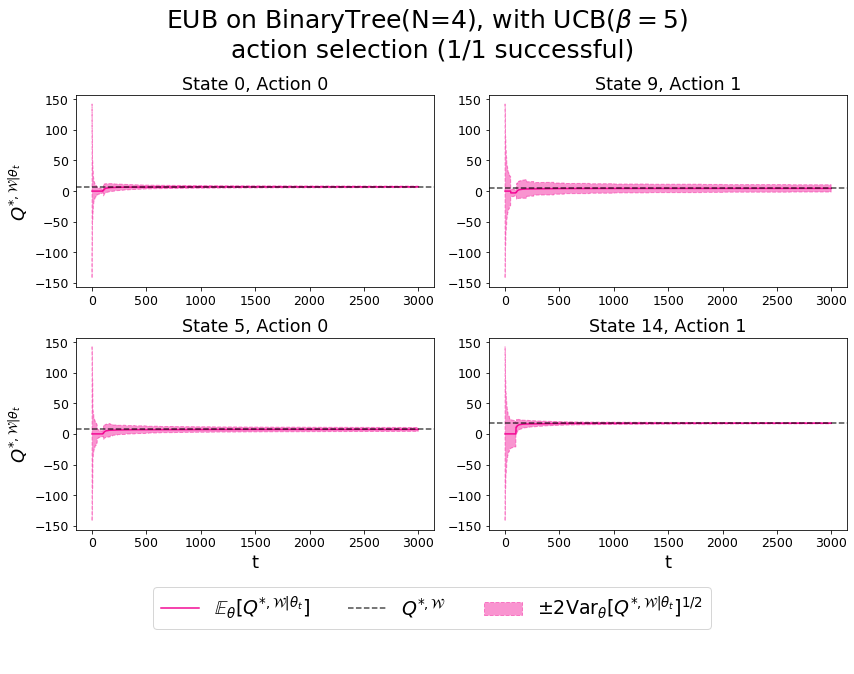

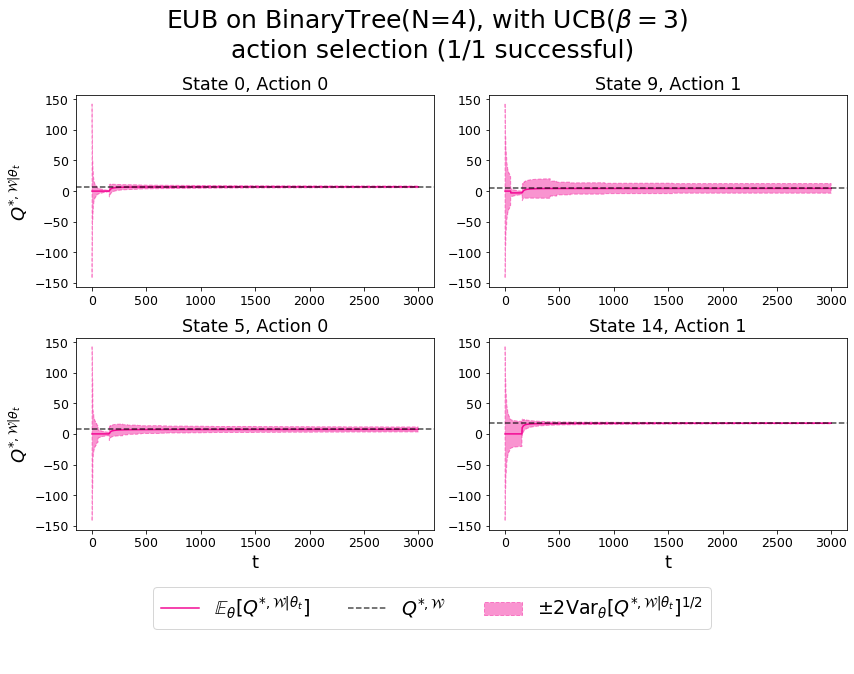

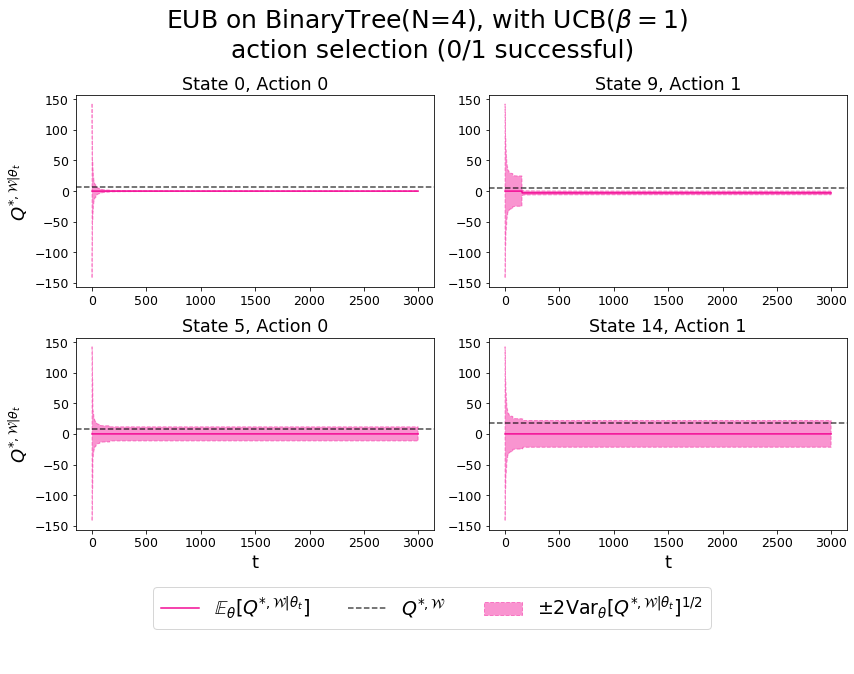

In [22]:
spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on BinaryTree(N=4), with UCB($\beta = 5$)' + ' \n action selection',
                 list_agents = ['beta_5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on BinaryTree(N=4), with UCB($\beta = 3$)' + ' \n action selection',
                 list_agents = ['beta_3'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on BinaryTree(N=4), with UCB($\beta = 1$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

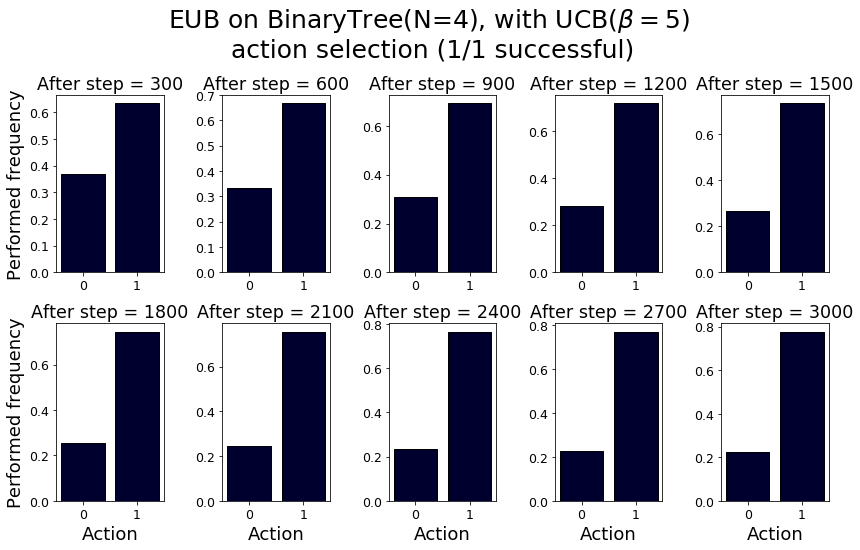

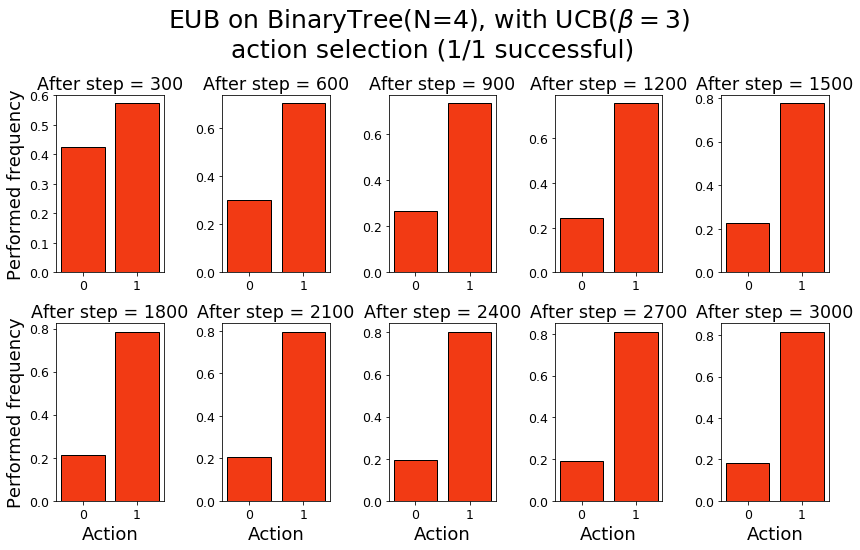

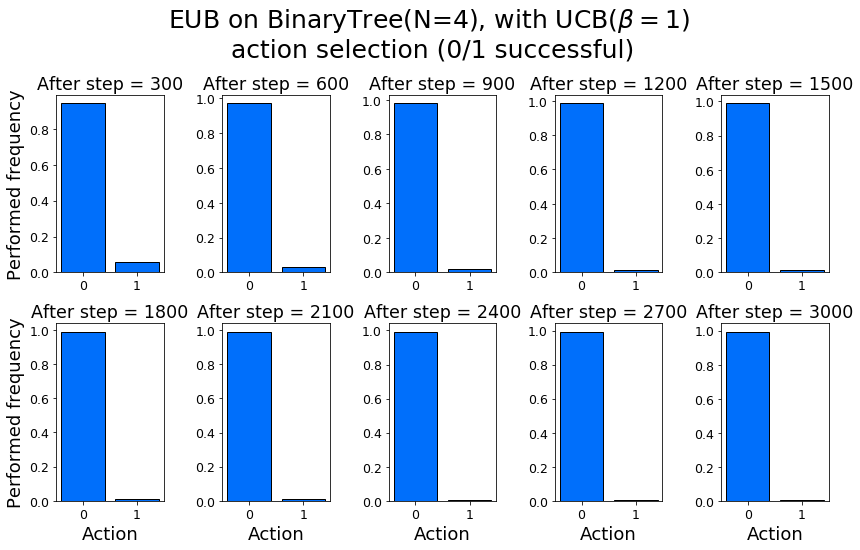

In [23]:
spl_eub.plot_action_freq(list_agents = ['beta_5'], 
                        colors = color_codes,
                        title = r'EUB on BinaryTree(N=4), with UCB($\beta = 5$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_eub.plot_action_freq(list_agents = ['beta_3'], 
                        colors = color_codes,
                        title = r'EUB on BinaryTree(N=4), with UCB($\beta = 3$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_eub.plot_action_freq(list_agents = ['beta_1'], 
                        colors = color_codes,
                        title = r'EUB on BinaryTree(N=4), with UCB($\beta = 1$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [24]:
spl_eub.print_performance_metrics()

Final regret of agent beta_5 is 1230.0
Final % of best action of agent beta_5 is 0.8516666666666667
Mean successful time is 106.0


Final regret of agent beta_3 is 755.0
Final % of best action of agent beta_3 is 0.8976666666666666
Mean successful time is 159.0


Final regret of agent beta_1 is 801.0
Final % of best action of agent beta_1 is 0.7466666666666667
Mean successful time is 3000.0




# Thompson Sampling

### UBE

In [25]:
len_episode = 3000

spl_ube = SimplePlotter('BT_TS_UBE',
                    env,
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 0.01, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_0p01', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 0.005, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_0p005', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 0.001, 
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'beta_0p001', 
                                          gamma =  0.98))

spl_ube.run_experiments(len_episode, 5, fair_comparison = False)

100%|██████████| 3000/3000 [01:35<00:00, 31.36it/s]


In [26]:
color_codes = {'beta_0p01': "#00002f", 
               'beta_0p005': "#f23a14",
               'beta_0p001': "#006ffb"}

legend_codes = {'beta_0p01': r'$\beta = 0.01$', 
               'beta_0p005': r'$\beta = 0.005$',
               'beta_0p001': r'$\beta = 0.001$'}

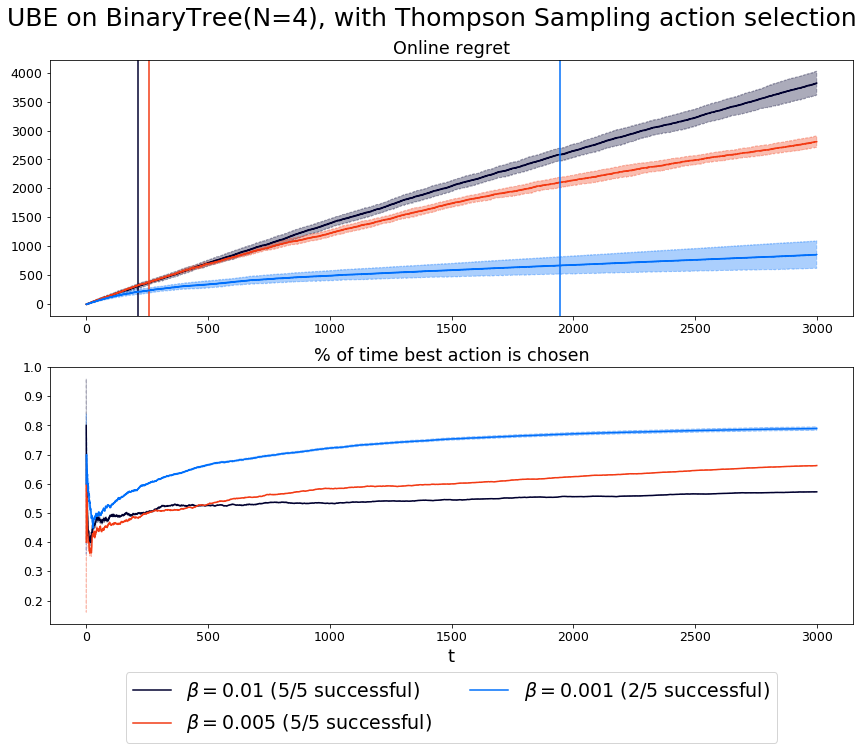

In [27]:
spl_ube.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'UBE on BinaryTree(N=4), with Thompson Sampling action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [28]:
colors = {'beta_0p01': {'mean': '#f23a14', 'var': '#f23a14'},
          'beta_0p005': {'mean': '#f23a14', 'var': '#f23a14'},
          'beta_0p001': {'mean': '#f23a14', 'var': '#f23a14'}}

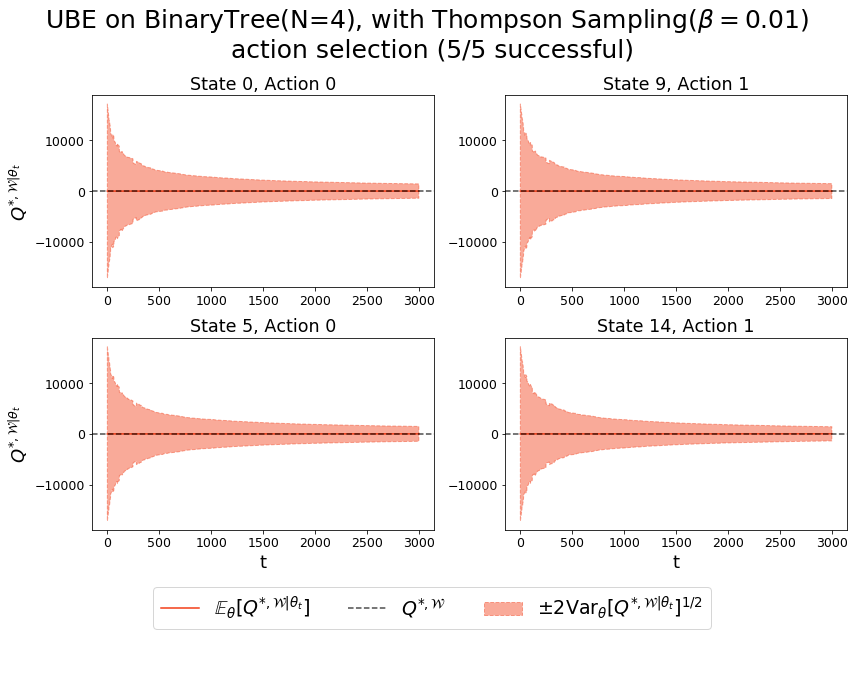

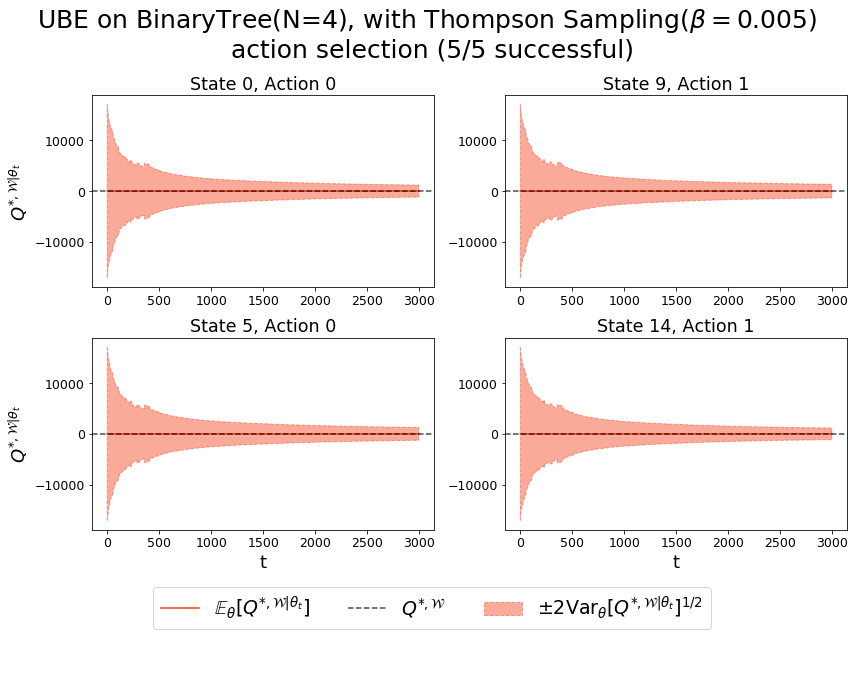

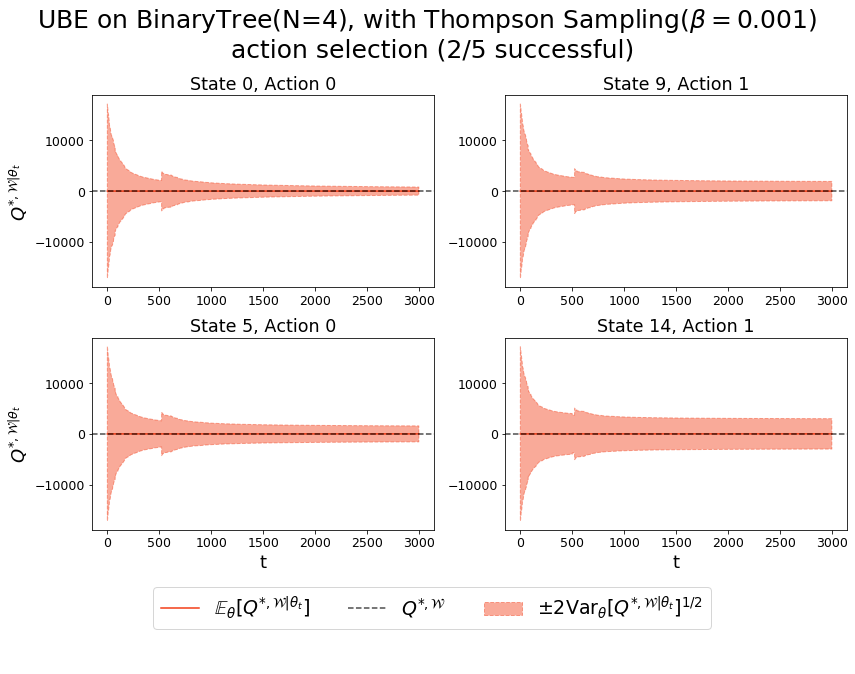

In [29]:
spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on BinaryTree(N=4), with Thompson Sampling($\beta = 0.01$)' + ' \n action selection',
                 list_agents = ['beta_0p01'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on BinaryTree(N=4), with Thompson Sampling($\beta = 0.005$)' + ' \n action selection',
                 list_agents = ['beta_0p005'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_ube.plot_Q_u(colors = colors,  
                 title = r'UBE on BinaryTree(N=4), with Thompson Sampling($\beta = 0.001$)' + ' \n action selection',
                 list_agents = ['beta_0p001'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

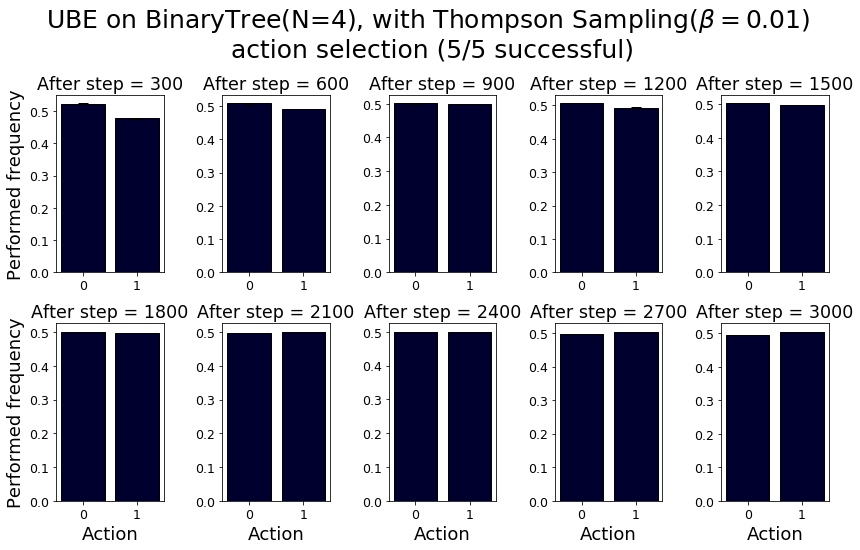

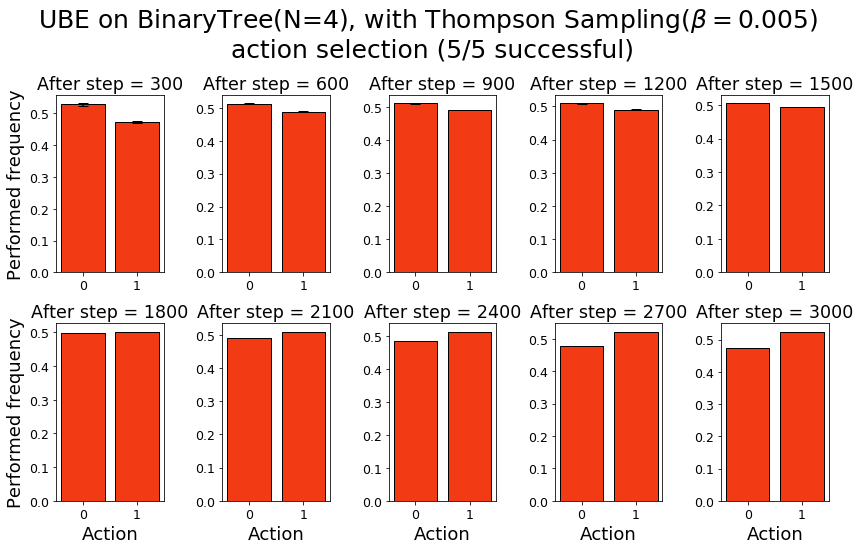

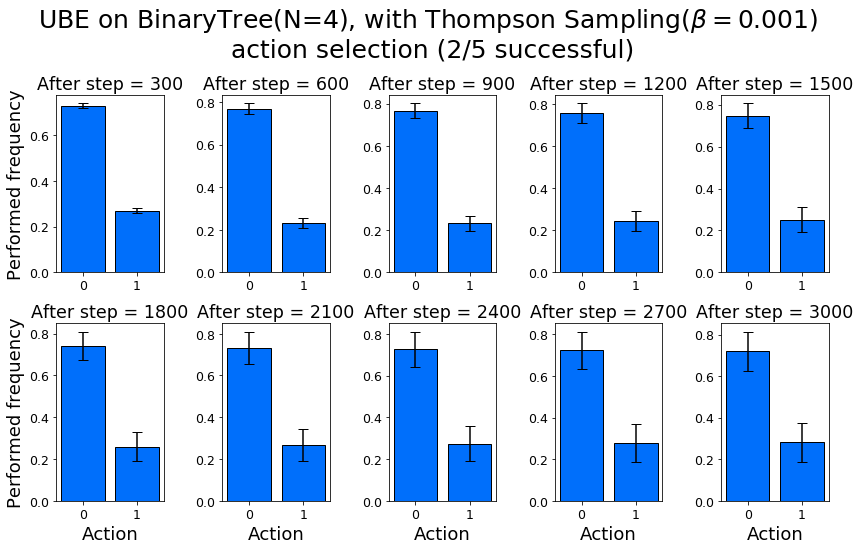

In [30]:
spl_ube.plot_action_freq(list_agents = ['beta_0p01'], 
                        colors = color_codes,
                        title = r'UBE on BinaryTree(N=4), with Thompson Sampling($\beta = 0.01$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_ube.plot_action_freq(list_agents = ['beta_0p005'], 
                        colors = color_codes,
                        title = r'UBE on BinaryTree(N=4), with Thompson Sampling($\beta = 0.005$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_ube.plot_action_freq(list_agents = ['beta_0p001'], 
                        colors = color_codes,
                        title = r'UBE on BinaryTree(N=4), with Thompson Sampling($\beta = 0.001$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [31]:
spl_ube.print_performance_metrics()

Final regret of agent beta_0p01 is 3819.2
Final % of best action of agent beta_0p01 is 0.5726666666666667
Mean successful time is 212.0


Final regret of agent beta_0p005 is 2807.0
Final % of best action of agent beta_0p005 is 0.6627333333333333
Mean successful time is 259.2


Final regret of agent beta_0p001 is 858.0
Final % of best action of agent beta_0p001 is 0.7897333333333333
Mean successful time is 1943.0




### EUDV

In [32]:
len_episode = 3000

spl_eudv = SimplePlotter('BT_TS_EUDV',
                    env,
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 15, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_15', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 5, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'beta_1', 
                                          gamma =  0.98))

spl_eudv.run_experiments(len_episode, 10, fair_comparison = False)

100%|██████████| 3000/3000 [00:21<00:00, 141.66it/s]


In [33]:
color_codes = {'beta_15': "#00002f", 
               'beta_5': "#f23a14",
               'beta_1': "#006ffb"}

legend_codes = {'beta_15': r'$\beta = 15$', 
               'beta_5': r'$\beta = 5$',
               'beta_1': r'$\beta = 1$'}

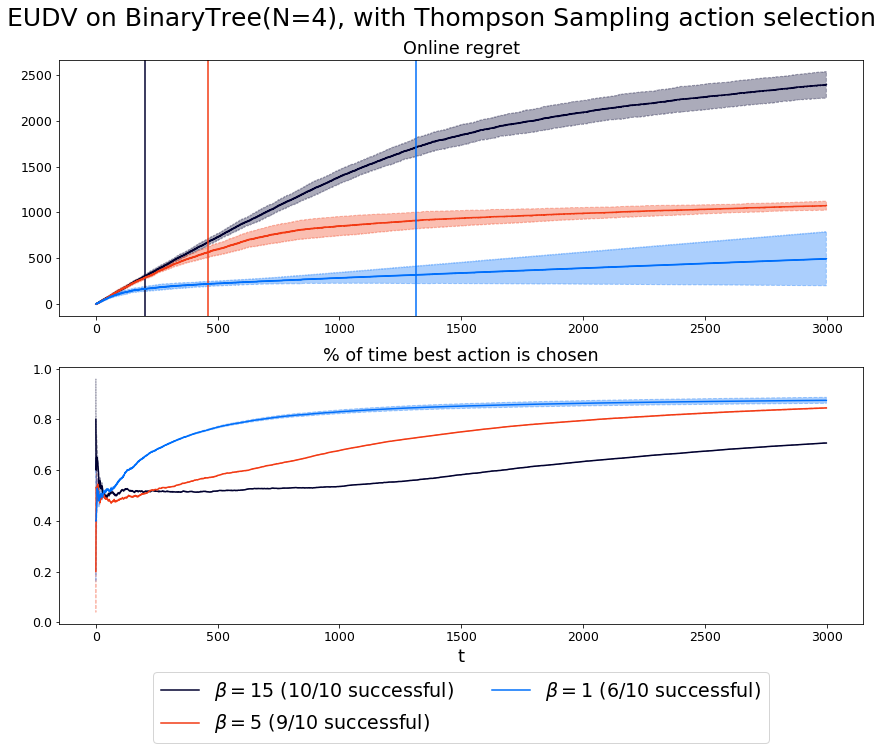

In [34]:
spl_eudv.plot_regret(color_codes = color_codes, 
                     legend_codes = legend_codes, 
                     title = 'EUDV on BinaryTree(N=4), with Thompson Sampling action selection',
                     bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [35]:
colors = {'beta_15': {'mean': '#3138fb', 'var': '#3138fb'},
          'beta_5': {'mean': '#3138fb', 'var': '#3138fb'},
         'beta_1': {'mean': '#3138fb', 'var': '#3138fb'}}

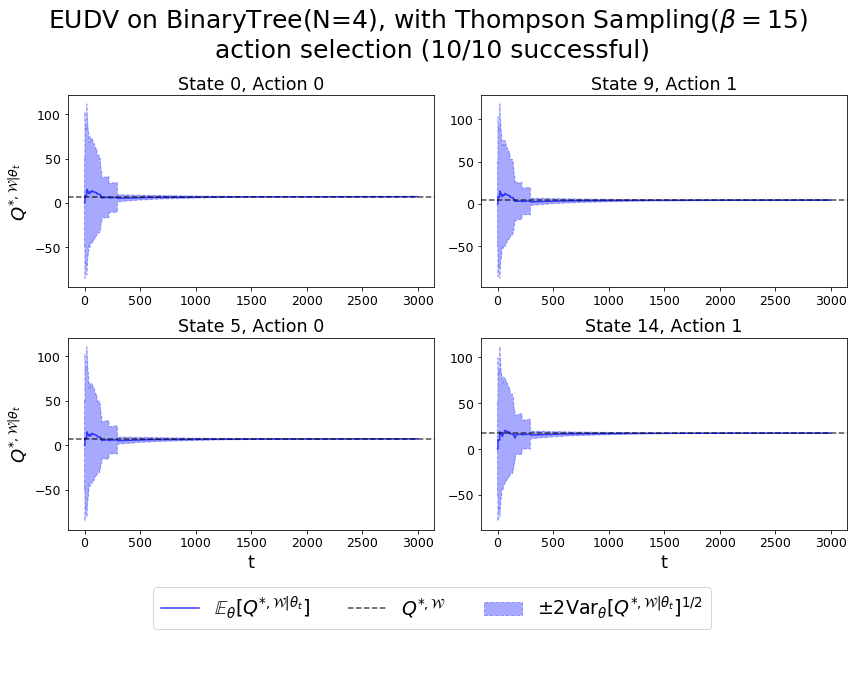

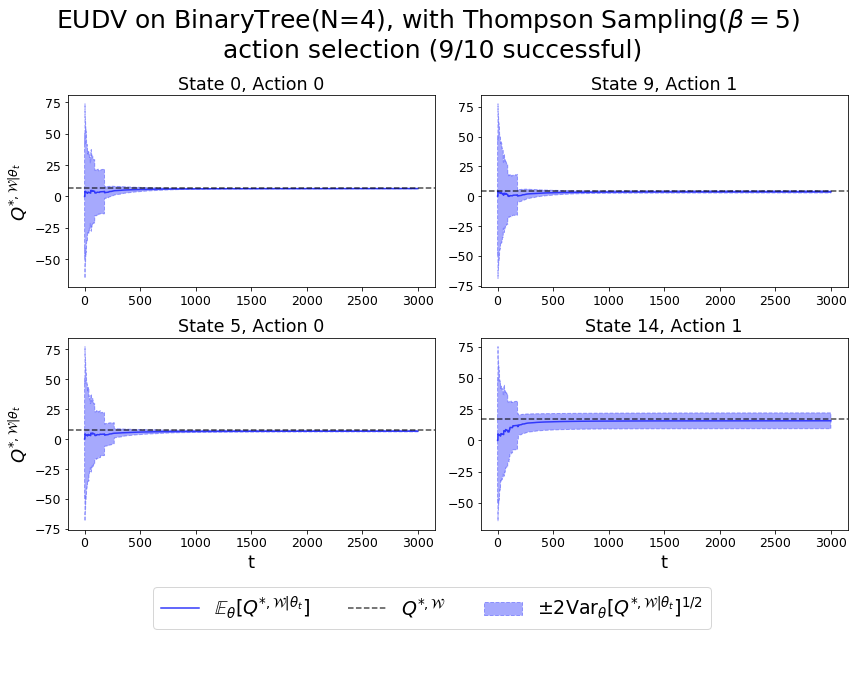

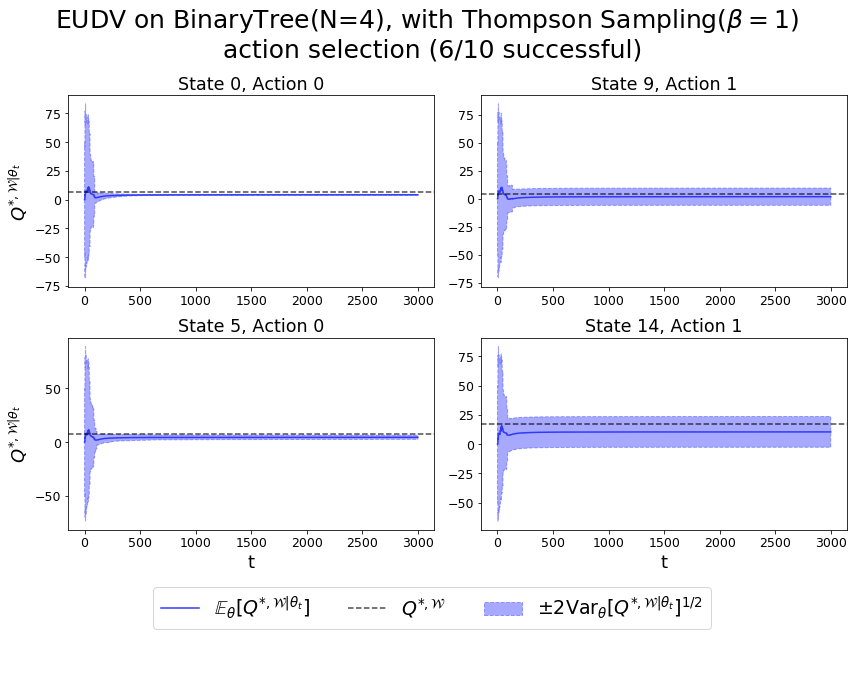

In [36]:
spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on BinaryTree(N=4), with Thompson Sampling($\beta = 15$)' + ' \n action selection',
                 list_agents = ['beta_15'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on BinaryTree(N=4), with Thompson Sampling($\beta = 5$)' + ' \n action selection',
                 list_agents = ['beta_5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_eudv.plot_Q_u(colors = colors,  
                 title = r'EUDV on BinaryTree(N=4), with Thompson Sampling($\beta = 1$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

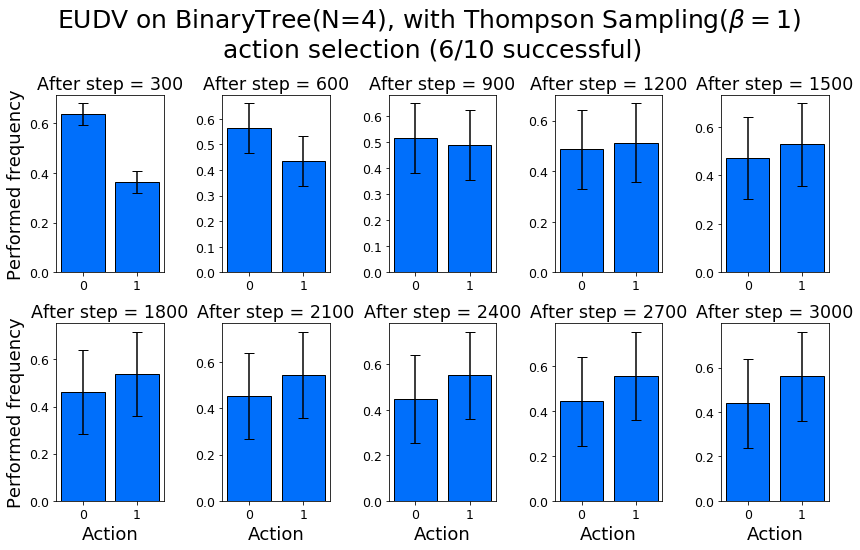

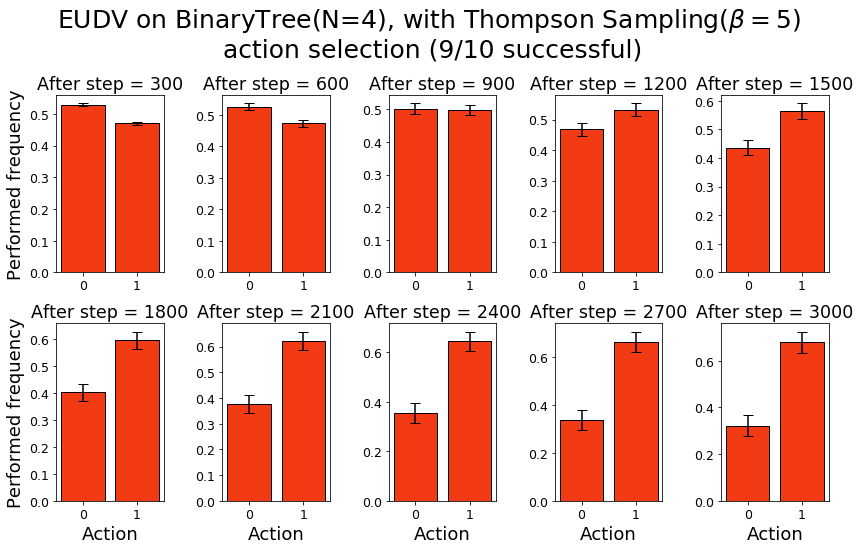

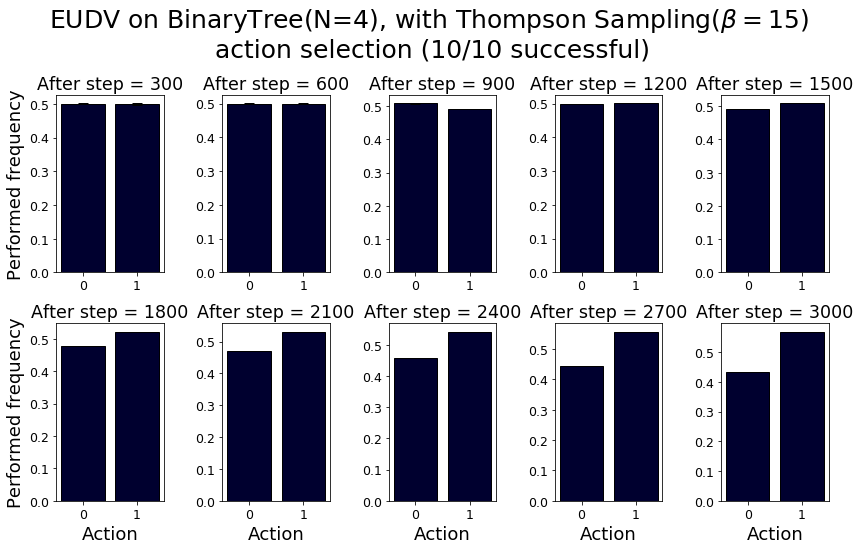

In [37]:
spl_eudv.plot_action_freq(list_agents = ['beta_1'], 
                        colors = color_codes,
                        title = r'EUDV on BinaryTree(N=4), with Thompson Sampling($\beta = 1$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_eudv.plot_action_freq(list_agents = ['beta_5'], 
                        colors = color_codes,
                        title = r'EUDV on BinaryTree(N=4), with Thompson Sampling($\beta = 5$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_eudv.plot_action_freq(list_agents = ['beta_15'], 
                        colors = color_codes,
                        title = r'EUDV on BinaryTree(N=4), with Thompson Sampling($\beta = 15$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [38]:
spl_eudv.print_performance_metrics()

Final regret of agent beta_15 is 2400.1
Final % of best action of agent beta_15 is 0.7068666666666668
Mean successful time is 200.1


Final regret of agent beta_5 is 1074.5
Final % of best action of agent beta_5 is 0.8452333333333334
Mean successful time is 459.5


Final regret of agent beta_1 is 494.6
Final % of best action of agent beta_1 is 0.8751999999999999
Mean successful time is 1315.5




### EUB

We can see that EUB exhibits this pathological behaviour, that when he finds the good state, immediately the uncertainty about all the other states it saw before increases

In [39]:
len_episode = 3000


spl_eub = SimplePlotter('BT_TS_EUB',
                    env,
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 10, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_10', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 5, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_5', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'ThompsonSampling',
                                          decision_making_method_params = 1, 
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'beta_1', 
                                          gamma =  0.98))

spl_eub.run_experiments(len_episode, 5, fair_comparison = False)

100%|██████████| 3000/3000 [04:10<00:00, 11.98it/s]


In [40]:
color_codes = {'beta_10': "#00002f", 
               'beta_5': "#f23a14",
               'beta_1': "#006ffb"}

legend_codes = {'beta_10': r'$\beta = 10$', 
               'beta_5': r'$\beta = 5$',
               'beta_1': r'$\beta = 1$'}

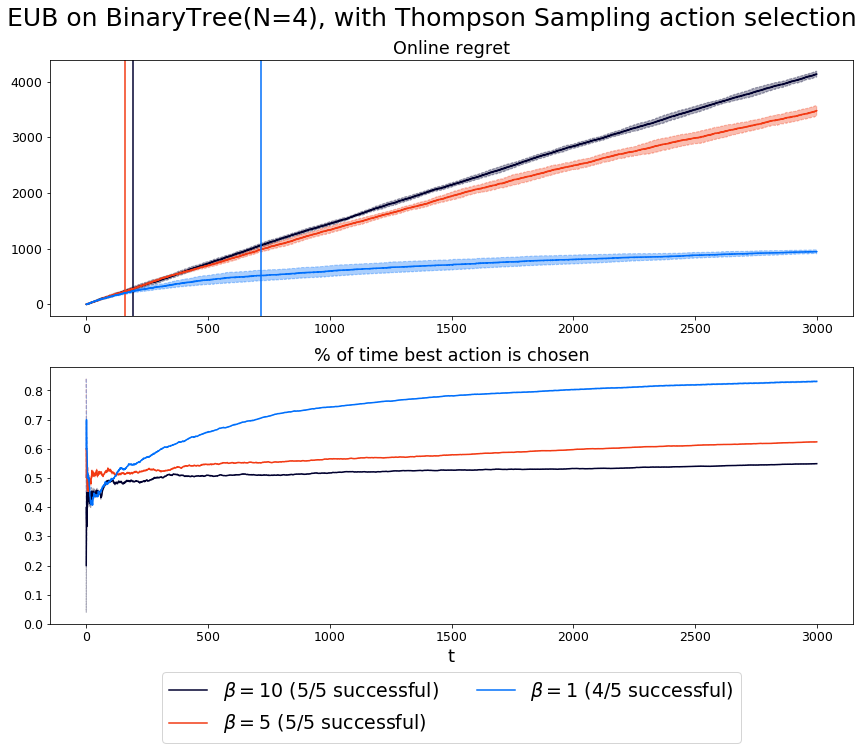

In [41]:
spl_eub.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'EUB on BinaryTree(N=4), with Thompson Sampling action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [42]:
colors = {'beta_10': {'mean': '#f30894', 'var': '#f30894'},
          'beta_5': {'mean': '#f30894', 'var': '#f30894'},
          'beta_1': {'mean': '#f30894', 'var': '#f30894'}}

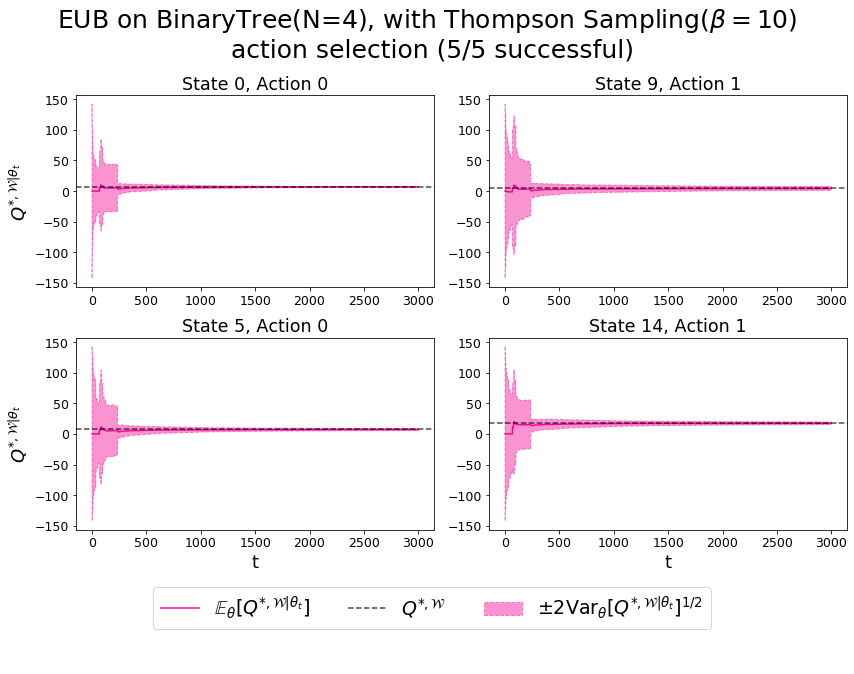

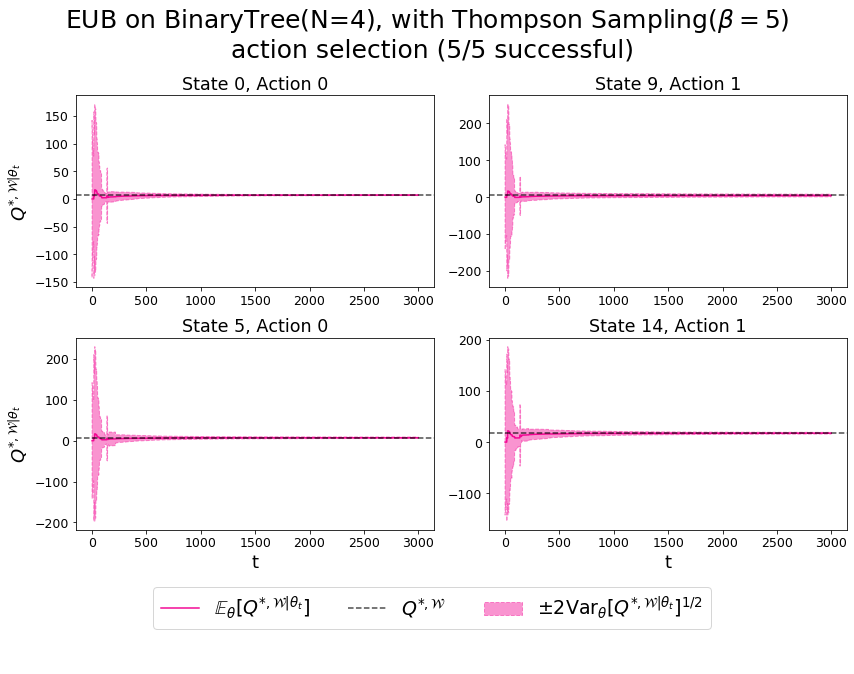

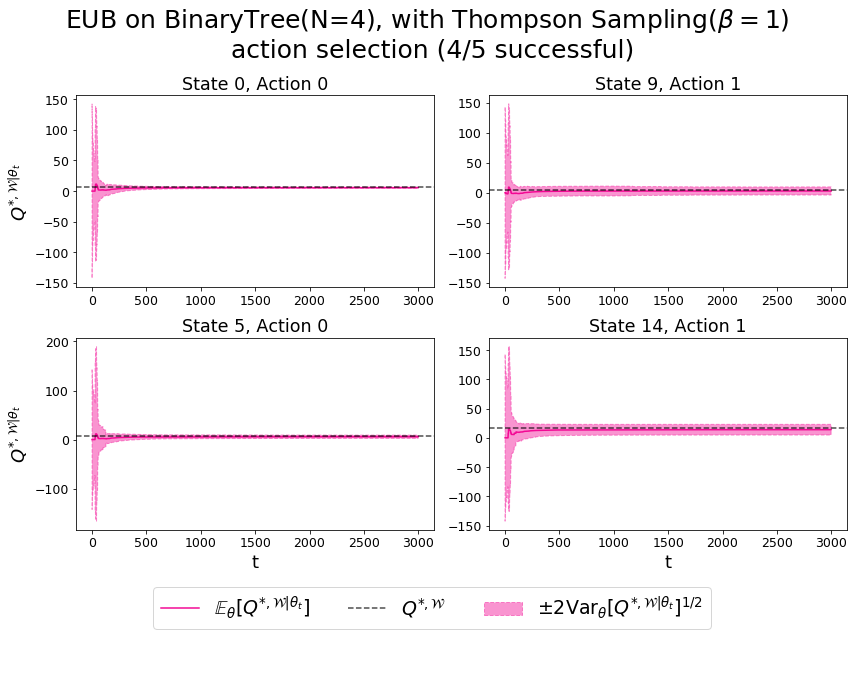

In [43]:
spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on BinaryTree(N=4), with Thompson Sampling($\beta = 10$)' + ' \n action selection',
                 list_agents = ['beta_10'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on BinaryTree(N=4), with Thompson Sampling($\beta = 5$)' + ' \n action selection',
                 list_agents = ['beta_5'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_eub.plot_Q_u(colors = colors,  
                 title = r'EUB on BinaryTree(N=4), with Thompson Sampling($\beta = 1$)' + ' \n action selection',
                 list_agents = ['beta_1'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

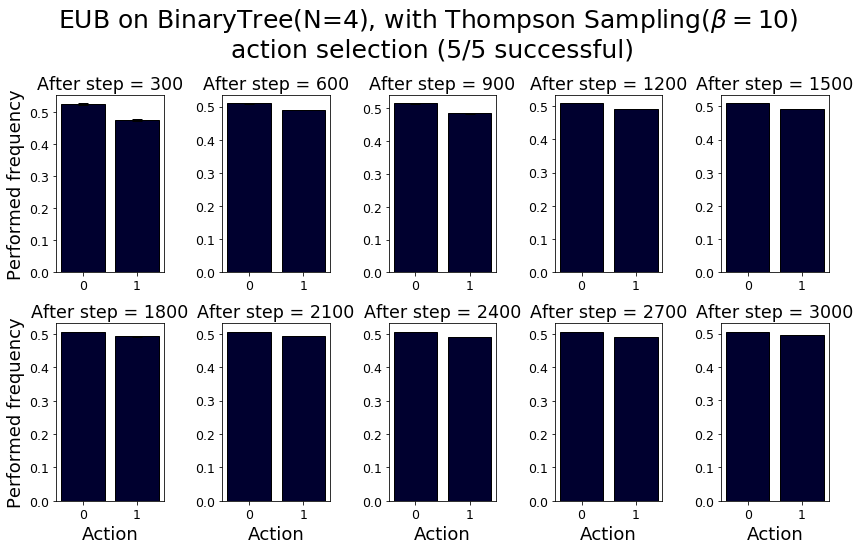

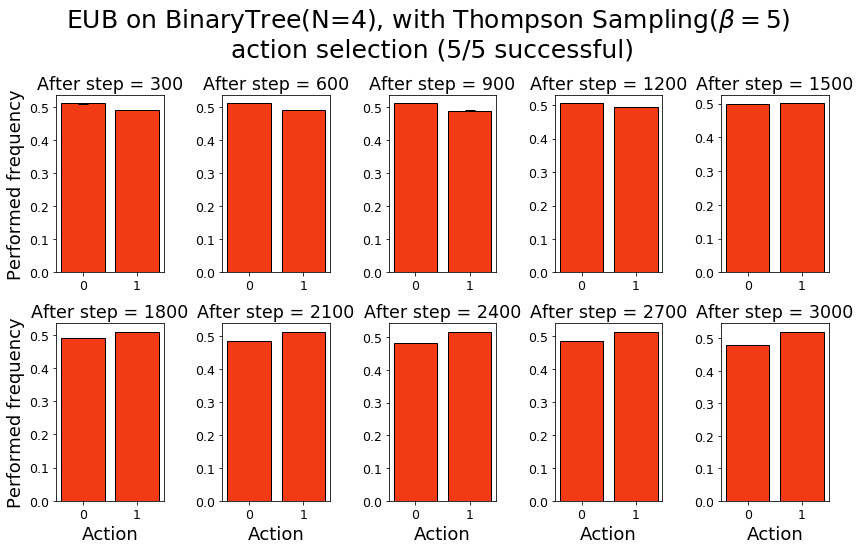

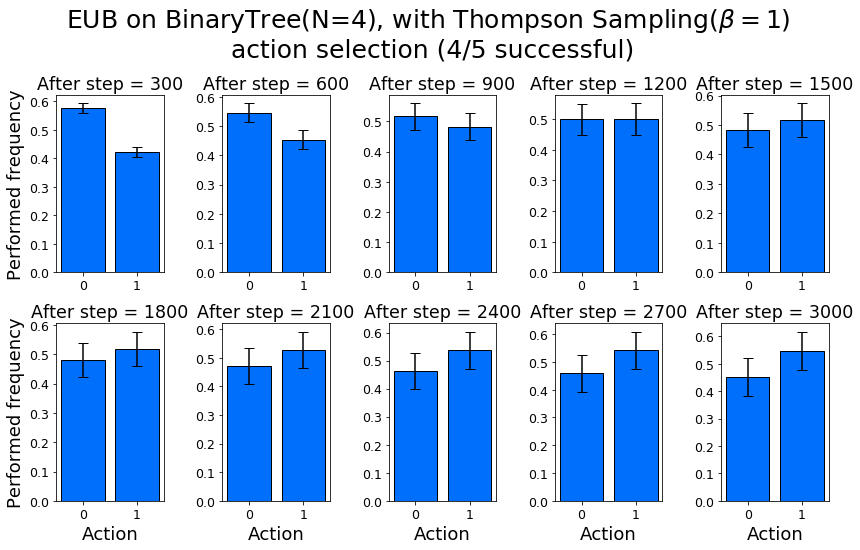

In [44]:
spl_eub.plot_action_freq(list_agents = ['beta_10'], 
                        colors = color_codes,
                        title = r'EUB on BinaryTree(N=4), with Thompson Sampling($\beta = 10$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_eub.plot_action_freq(list_agents = ['beta_5'], 
                        colors = color_codes,
                        title = r'EUB on BinaryTree(N=4), with Thompson Sampling($\beta = 5$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_eub.plot_action_freq(list_agents = ['beta_1'], 
                        colors = color_codes,
                        title = r'EUB on BinaryTree(N=4), with Thompson Sampling($\beta = 1$)' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [45]:
spl_eub.print_performance_metrics()

Final regret of agent beta_10 is 4135.6
Final % of best action of agent beta_10 is 0.5491999999999999
Mean successful time is 190.0


Final regret of agent beta_5 is 3476.8
Final % of best action of agent beta_5 is 0.624
Mean successful time is 159.6


Final regret of agent beta_1 is 946.8
Final % of best action of agent beta_1 is 0.8311333333333334
Mean successful time is 715.8




# Create one plot that we need

In [46]:
def get_the_plot_we_need(self, list_agents = None, color_codes = None, 
                    figsize = (12,8), title = None, legend_codes = None,
                    which = 'all', rect = [0, 0.1, 1, 0.9], 
                    bbox = (0.5, -0.25),
                    suptitle_fs = 25, xy_label_fs = 18, 
                    titles_fs = 17.5, ticks_fs = 12.5, legend_fs = 19, 
                    ncol = None, dpi = 300, mult = 1):
        '''
        Plots regret and % of best action
        '''
        if list_agents is None:
            list_agents = self.list_agents()
        
        fig    = plt.figure(figsize = figsize)
        ax_reg = fig.add_subplot(111)

        fig.suptitle(title, fontsize=suptitle_fs)

        for agent_name in list_agents:
            agent = getattr(self, agent_name)
            
            if which == 'all':
                regret         = agent.mean_regret
                sd_regret      = agent.sd_regret 

                best_action    = agent.mean_best_action
                sd_best_action = agent.sd_best_action

                num = len(agent.success)
            if which == 'success':
                if hasattr(agent, 'mean_regret_s'):
                    regret    = agent.mean_regret_s
                    sd_regret = agent.sd_regret_s

                    best_action    = agent.mean_best_action_s
                    sd_best_action = agent.sd_best_action_s

                    num = len(agent.success)
                else:
                    continue
            if which == 'almost_success':
                if hasattr(agent, 'mean_regret_s_a'):
                    regret    = agent.mean_regret_a_s
                    sd_regret = agent.sd_regret_a_s

                    best_action    = agent.mean_best_action_a_s
                    sd_best_action = agent.sd_best_action_a_s

                    num = len(agent.almost_success)
                else:
                    continue
            
            add_string = ' ({}/{} successful)'.format(mult*num, mult*agent.num_repeats)

            this_color = np.random.rand(3,)

            ax_reg.plot(regret,
                        color = color_codes[agent_name] if color_codes is not None else this_color,
                        label = legend_codes[agent_name] + add_string if legend_codes is not None else agent_name + add_string)
            ax_reg.fill_between(np.arange(len(regret)),
                                regret-sd_regret,
                                regret+sd_regret,
                                alpha=0.33, linestyle = 'dashed',
                                color = color_codes[agent_name] if color_codes is not None else this_color)
                            
            ax_reg.set_xlabel('t', fontsize = xy_label_fs)
            
            ax_reg.axvline(x = agent.mean_first_t_opt,
                           color = color_codes[agent_name] if color_codes is not None else this_color)
            
            ax_reg.tick_params(axis='both', labelsize=ticks_fs)
        
        ax_reg.set_title('Online regret', fontsize = titles_fs)

        #ax_reg.legend(loc='lower center', fontsize = 16, bbox_to_anchor=(0.5, 0))
        ax_reg.legend(loc='lower center', fontsize = legend_fs, 
                     bbox_to_anchor=bbox, ncol = ncol if ncol is not None else 1)

        plt.tight_layout(rect=rect)

        fig.savefig(self.foldername + '/regret_only', dpi = dpi, bbox_inches='tight')
        
        plt.show()

In [47]:
color_codes = {'beta_0p01': "#00002f", 
               'beta_0p005': "#f23a14",
               'beta_0p001': "#006ffb"}

legend_codes = {'beta_0p01': r'$\beta = 0.01$', 
               'beta_0p005': r'$\beta = 0.005$',
               'beta_0p001': r'$\beta = 0.001$'}

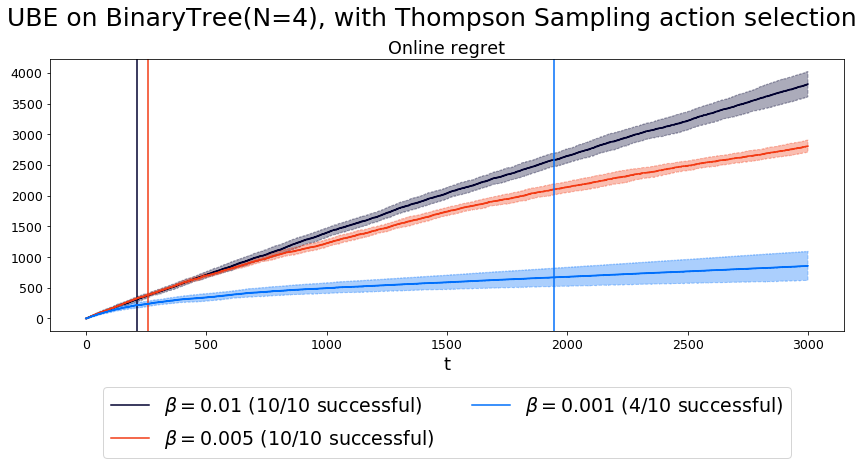

In [48]:
get_the_plot_we_need(spl_ube, 
                    color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'UBE on BinaryTree(N=4), with Thompson Sampling action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, 0.15, 1, 0.95],
                    dpi = 300, mult = 2)

In [49]:
color_codes = {'beta_15': "#00002f", 
               'beta_5': "#f23a14",
               'beta_1': "#006ffb"}

legend_codes = {'beta_15': r'$\beta = 15$', 
               'beta_5': r'$\beta = 5$',
               'beta_1': r'$\beta = 1$'}

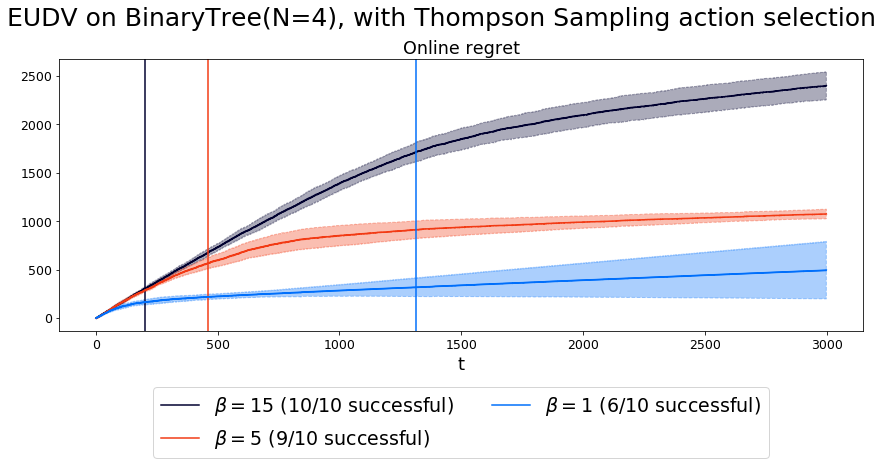

In [50]:
get_the_plot_we_need(spl_eudv, 
                    color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'EUDV on BinaryTree(N=4), with Thompson Sampling action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, 0.15, 1, 0.95],
                    dpi = 300)

In [51]:
color_codes = {'beta_10': "#00002f", 
               'beta_5': "#f23a14",
               'beta_1': "#006ffb"}

legend_codes = {'beta_10': r'$\beta = 10$', 
               'beta_5': r'$\beta = 5$',
               'beta_1': r'$\beta = 1$'}

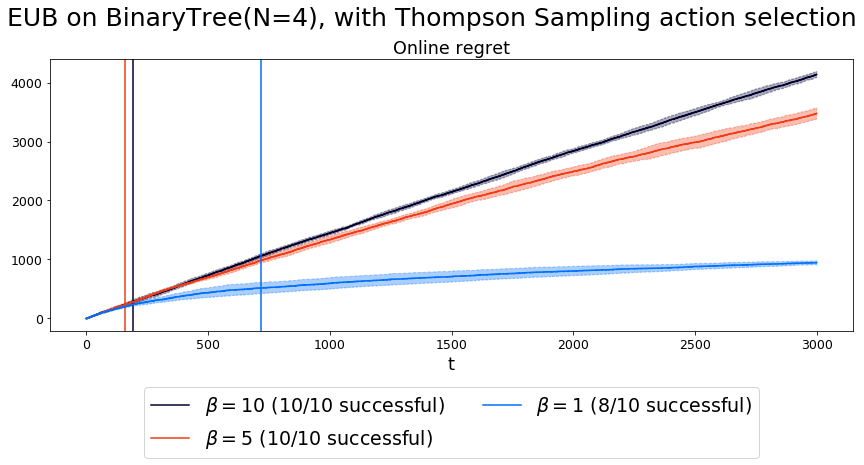

In [52]:
get_the_plot_we_need(spl_eub, 
                    color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'EUB on BinaryTree(N=4), with Thompson Sampling action selection',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, 0.15, 1, 0.95],
                    dpi = 300, mult = 2)

# GKG1

In [ ]:
len_episode = 3000

spl_gkg = SimplePlotter('BT_GKG',
                    env,
                    BayesianAgent.default(decision_making_method = 'GKG1',
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'EUB', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'GKG1',
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'UBE', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'GKG1',
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'EUDV', 
                                          gamma =  0.98))

spl_gkg.run_experiments(len_episode, 1, fair_comparison = False)

 54%|█████▍    | 1630/3000 [06:47<05:28,  4.17it/s]

In [77]:
color_codes = {'EUB': '#f30894',
               'EUDV': '#3138fb',
               'UBE': '#f23a14'}

legend_codes = {'EUB': 'EUB',
               'EUDV': 'EUDV',
               'UBE': 'UBE'}

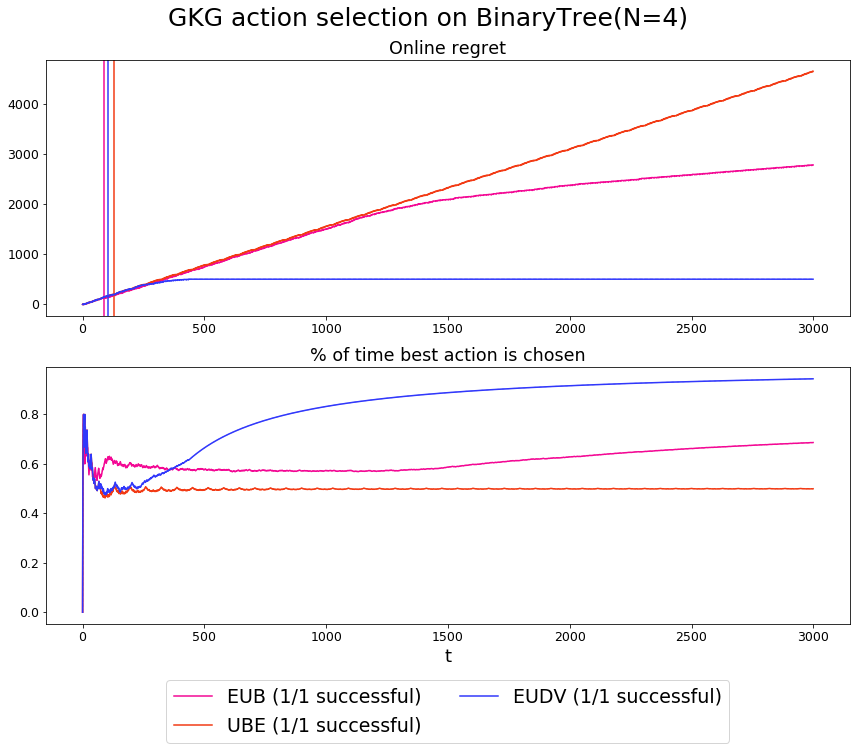

In [78]:
spl_gkg.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'GKG action selection on BinaryTree(N=4)',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [ ]:
colors = {'UBE': {'mean': '#f23a14', 'var': '#f23a14'},
          'EUB': {'mean': '#f30894', 'var': '#f30894'},
          'EUDV': {'mean': '#3138fb', 'var': '#3138fb'}}

In [ ]:
spl_gkg.plot_Q_u(colors = colors,  
                 title = r'EUB on BinaryTree(N=4), with GKG' + ' \n action selection',
                 list_agents = ['EUB'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_gkg.plot_Q_u(colors = colors,  
                 title = r'UBE on BinaryTree(N=4), with GKG' + ' \n action selection',
                 list_agents = ['UBE'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

spl_gkg.plot_Q_u(colors = colors,  
                 title = r'EUDV on BinaryTree(N=4), with GKG' + ' \n action selection',
                 list_agents = ['EUDV'],
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

In [ ]:
spl_gkg.plot_action_freq(list_agents = ['UBE'], 
                        colors = color_codes,
                        title = r'UBE on BinaryTree(N=4), with GKG' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_gkg.plot_action_freq(list_agents = ['EUDV'], 
                        colors = color_codes,
                        title = r'EUDV on BinaryTree(N=4), with GKG' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_gkg.plot_action_freq(list_agents = ['EUB'], 
                        colors = color_codes,
                        title = r'EUB on BinaryTree(N=4), with GKG' +  '\n action selection',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [ ]:
spl_gkg.print_performance_metrics()

# PSRL

In [ ]:
len_episode = 3000

spl_psrl = SimplePlotter('BT_PSRL',
                    env,
                    BayesianAgent.default(decision_making_method = 'PSRL',
                                          Q_method = 'predictive',
                                          u_method = 'monte_carlo',
                                          u_method_params = 30,
                                          name = 'PSRL', 
                                          gamma =  0.98))

spl_psrl.run_experiments(len_episode, 10, fair_comparison = False)

In [80]:
color_codes = {'PSRL': '#1fa843'}

legend_codes = {'PSRL': 'PSRL'}

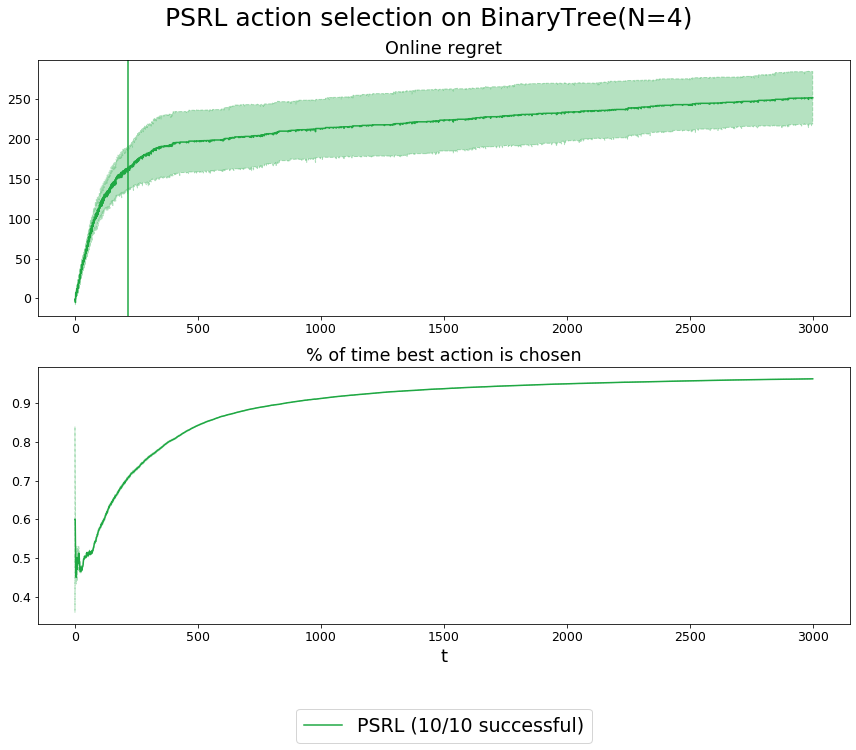

In [81]:
spl_psrl.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'PSRL action selection on BinaryTree(N=4)',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [ ]:
spl_psrl.plot_action_freq(colors = color_codes,
                        title = r'PRSL action selection on BinaryTree(N=4)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [ ]:
colors = {'PSRL': {'mean': 'red', 'var': 'red'}}

In [ ]:
spl_psrl.plot_Q_u(colors = colors,
                 title = r'PRSL action selection on BinaryTree(N=4)',
                 bbox = (0.5, 0.05),
                 figsize = (12,10),
                 state_actions = [(0,0), (9,1), (5,0), (14,1)],
                 rect = [0, 0.18, 1, 0.9],
                 dpi = 300)

In [ ]:
spl_psrl.print_performance_metrics()

# MCKG 

In [ ]:
len_episode = 3000


spl_mckg = SimplePlotter('BT_MCKG',
                    env,
                    BayesianAgent.default(decision_making_method = 'MCKG1',
                                          Q_method = 'predictive',
                                          name = 'MCKG1',
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'MCKGN',
                                          decision_making_method_params = 2,
                                          Q_method = 'predictive',
                                          name = 'MCKG2', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'MCKGN',
                                          decision_making_method_params = 3,
                                          Q_method = 'predictive',
                                          name = 'MCKG3', 
                                          gamma =  0.98))

spl_mckg.run_experiments(len_episode, 10, fair_comparison = False)

In [82]:
color_codes = {'MCKG3': "#00002f", 
               'MCKG2': "#f23a14",
               'MCKG1': "#006ffb"}

legend_codes = {'MCKG3': 'MCKG-3', 
               'MCKG2': 'MCKG-2',
               'MCKG1': 'MCKG-1'}

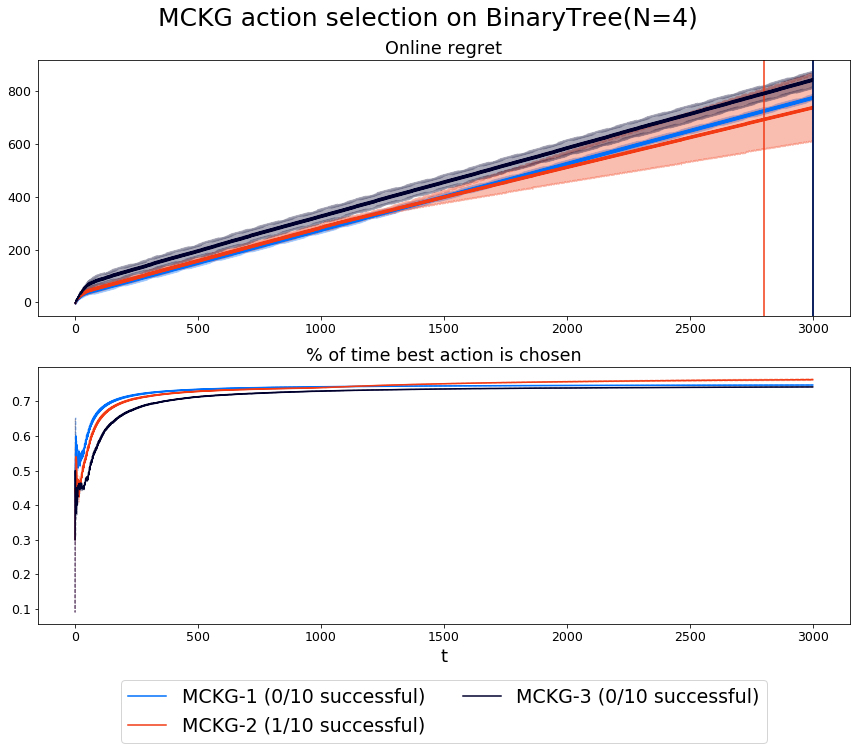

In [83]:
spl_mckg.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'MCKG action selection on BinaryTree(N=4)',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [ ]:
spl_mckg.print_performance_metrics()

# MCKG + OFU

In [ ]:
len_episode = 3000

reward_params = {'mu': 10,
                  'lambda': 0.02,
                  'alpha': 2,
                  'beta': 2}

spl_mckg_ofu = SimplePlotter('BT_MCKG_ofu',
                    env,
                    BayesianAgent.default(decision_making_method = 'MCKG1',
                                          Q_method = 'predictive',
                                          name = 'MCKG1',
                                          reward_params = reward_params,
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'MCKGN',
                                          decision_making_method_params = 2,
                                          Q_method = 'predictive',
                                          reward_params = reward_params,
                                          name = 'MCKG2', 
                                          gamma =  0.98),
                    BayesianAgent.default(decision_making_method = 'MCKGN',
                                          decision_making_method_params = 3,
                                          Q_method = 'predictive',
                                          reward_params = reward_params,
                                          name = 'MCKG3', 
                                          gamma =  0.98))

spl_mckg_ofu.run_experiments(len_episode, 10, fair_comparison = False)

In [84]:
color_codes = {'MCKG3': "#00002f", 
               'MCKG2': "#f23a14",
               'MCKG1': "#006ffb"}

legend_codes = {'MCKG3': 'MCKG-3', 
               'MCKG2': 'MCKG-2',
               'MCKG1': 'MCKG-1'}

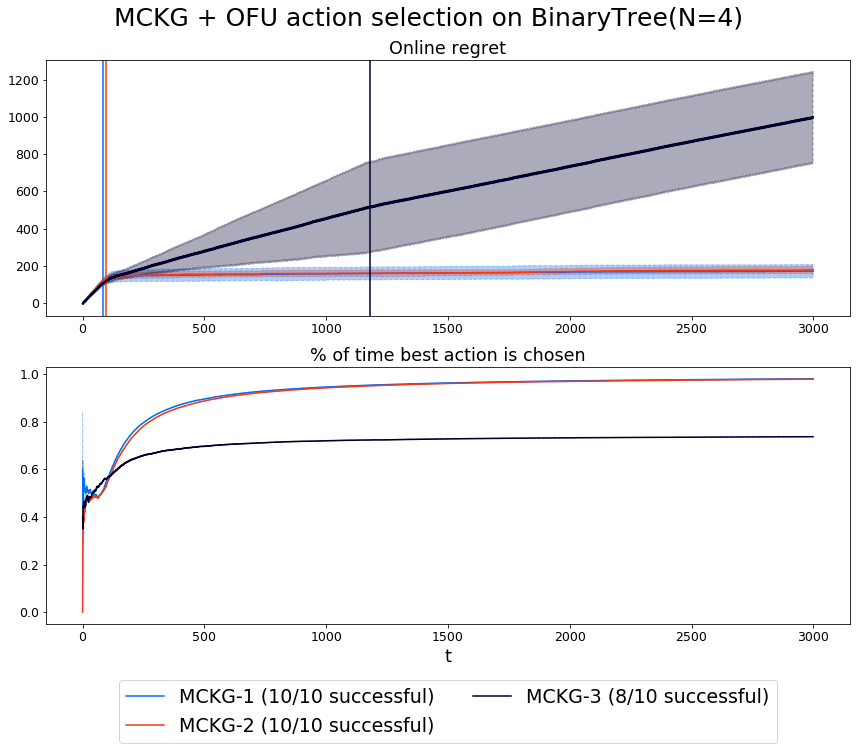

In [85]:
spl_mckg_ofu.plot_regret(color_codes = color_codes, 
                    legend_codes = legend_codes, 
                    title = 'MCKG + OFU action selection on BinaryTree(N=4)',
                    bbox = (0.5, -0.5),
                    figsize = (12,10), 
                    ncol = 2, 
                    rect = [0, -0.05, 1, 0.95],
                    dpi = 300)

In [ ]:
spl_mckg_ofu.plot_action_freq(colors = color_codes,
                         list_agents = ['MCKG1'],
                        title = r'MCKG-1 action selection on BinaryTree(N=4)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_mckg_ofu.plot_action_freq(colors = color_codes,
                         list_agents = ['MCKG2'],
                        title = r'MCKG-2 action selection on BinaryTree(N=4)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_mckg_ofu.plot_action_freq(colors = color_codes,
                         list_agents = ['MCKG3'],
                        title = r'MCKG-3 action selection on BinaryTree(N=4)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [ ]:
spl_mckg_ofu.plot_state_freq(colors = color_codes,
                         list_agents = ['MCKG1'],
                        title = r'MCKG-1 action selection on BinaryTree(N=4)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_mckg_ofu.plot_state_freq(colors = color_codes,
                         list_agents = ['MCKG2'],
                        title = r'MCKG-2 action selection on BinaryTree(N=4)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

spl_mckg_ofu.plot_state_freq(colors = color_codes,
                         list_agents = ['MCKG6'],
                        title = r'MCKG-3 action selection on BinaryTree(N=4)',
                        rect= [0, 0.22, 1, 0.9],
                        dpi = 300)

In [76]:
spl_mckg_ofu.print_performance_metrics()

Final regret of agent MCKG1 is 171.4
Final % of best action of agent MCKG1 is 0.9808666666666668
Mean successful time is 85.8


Final regret of agent MCKG2 is 179.0
Final % of best action of agent MCKG2 is 0.9792666666666667
Mean successful time is 95.5


Final regret of agent MCKG3 is 1001.1
Final % of best action of agent MCKG3 is 0.7377666666666667
Mean successful time is 1181.1


